#교수님이 주신 mnist데이터

In [ ]:
pip install torch torchvision torchaudio

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/0d/4a/e51420d46cfc90562e85af2fee912237c662ab31140ab179e49bd69401d6/torch-2.5.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/69/55/ce836703ff77bb21582c3098d5311f8ddde7eadc7eab04be9561961f4725/torchvision-0.20.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/32/6a/019e426ab4af487167182a19e115fc03234fe28bc30e22cb0e1a9958f70e/torchaudio-2.5.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for sympy==1.13.1 from https://files.pythonhosted.org/packages/b2/fe/81695a1aa331a842b582453b605175f419

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 50.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.27MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.3MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.30MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

0/60000 images processed...
10000/60000 images processed...
20000/60000 images processed...
30000/60000 images processed...
40000/60000 images processed...
50000/60000 images processed...
All images are processed and colorized.


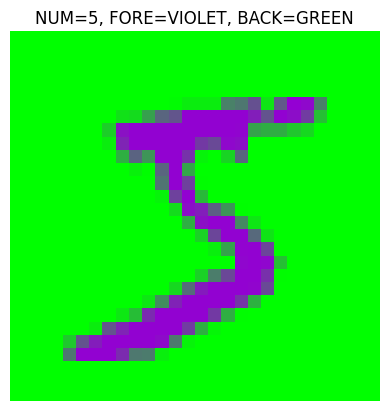

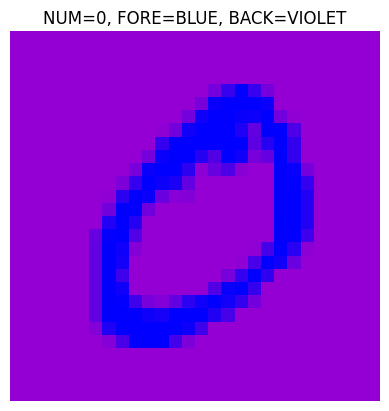

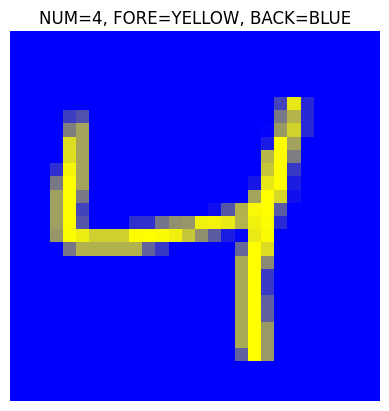

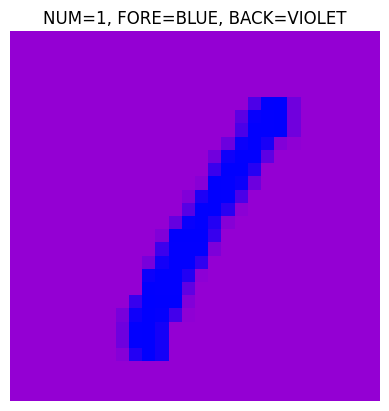

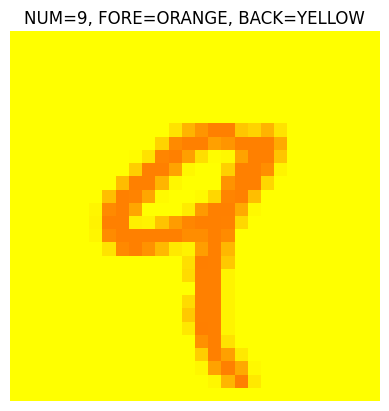

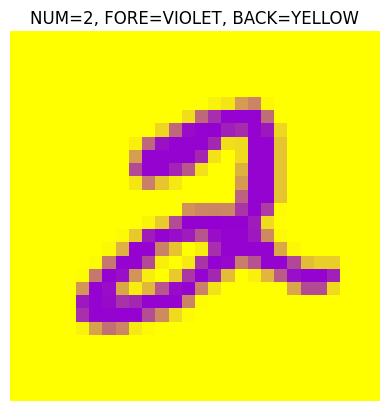

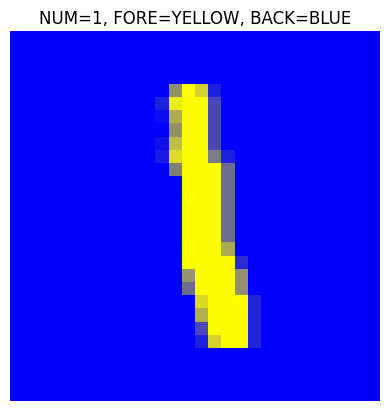

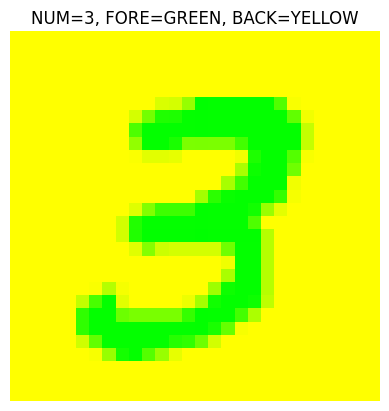

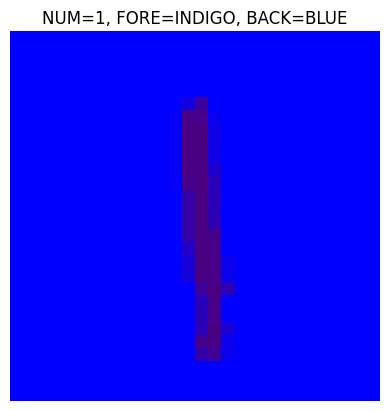

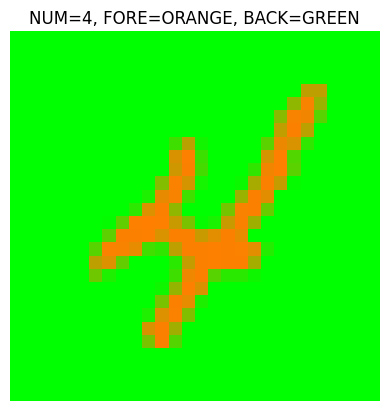

(<PIL.Image.Image image mode=RGB size=28x28 at 0x7E2F10B5D810>, 5, 'VIOLET', 'GREEN')


In [ ]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import random

# 시드 고정
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)



# MNIST 데이터셋을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

RAINBOW_NAMES = [
    'RED',
    'ORANGE',
    'YELLOW',
    'GREEN',
    'BLUE',
    'INDIGO',
    'VIOLET'
]

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGBA')
    return colored_digit

def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

# 모든 MNIST 데이터를 처리합니다.
output_images = []  # 결과 이미지를 저장할 리스트

for idx in range(len(mnist)):
    # 이미지와 레이블을 가져옵니다.
    image, label = mnist[idx]
    pil_image = transforms.ToPILImage()(image)

    # 전경과 배경 색상을 무작위로 선택합니다.
    fg_color, fg_label = get_random_rainbow_color()
    bg_color, bg_label = get_random_rainbow_color()

    # 전경과 배경 색상이 같지 않도록 보장합니다.
    while bg_color == fg_color:
        bg_color, bg_label = get_random_rainbow_color()

    # 선택된 색상으로 숫자 이미지를 색칠합니다.
    colored_digit = colorize_digit(pil_image, fg_color, bg_color)

    if colored_digit is not None:
        # 최종 이미지를 생성합니다.
        final_image = overlay_digit_on_background(colored_digit)
        output_images.append((final_image, label, fg_label, bg_label))  # 결과 저장

    # 중간 진행 상황 출력 (선택사항)
    if idx % 10000 == 0:
        print(f"{idx}/{len(mnist)} images processed...")

print("All images are processed and colorized.")

# 결과를 확인하기 위해 일부 이미지를 출력합니다.
for i in range(10):  # 10개 샘플 출력
    plt.figure()
    plt.imshow(output_images[i][0])
    plt.axis('off')
    plt.title(f'NUM={output_images[i][1]}, FORE={output_images[i][2]}, BACK={output_images[i][3]}')
    plt.show()
print(output_images[0])

#주신 데이터만으로 classifier를 만들경우

In [ ]:
import random



total_count = len(output_images)


train_size = int(total_count * 0.8)   # 80%
val_size = int(total_count * 0.1)    # 10%
test_size = total_count - train_size - val_size  # 나머지는 test


train_data = output_images[:train_size]
val_data = output_images[train_size:train_size + val_size]
test_data = output_images[train_size + val_size:]


print(f"Train data: {len(train_data)} samples")
print(f"Validation data: {len(val_data)} samples")
print(f"Test data: {len(test_data)} samples")


Train data: 48000 samples
Validation data: 6000 samples
Test data: 6000 samples


#minmax 적용

In [ ]:
import numpy as np

def minmax_scale_image(image):
    """
    RGB 이미지를 [0, 1] 범위로 MinMax 스케일링합니다.
    """
    # 이미지를 numpy 배열로 변환
    image_array = np.asarray(image).astype(np.float32)

    # MinMax 스케일링 적용
    image_array /= 255.0  # 픽셀 값을 [0, 1]로 정규화

    return image_array

# 학습 데이터에 MinMax 스케일링 적용
scaled_train_data = []
for img, digit_label, fg_label, bg_label in train_data:
    scaled_image = minmax_scale_image(img)  # 이미지를 스케일링
    scaled_train_data.append((scaled_image, digit_label, fg_label, bg_label))

scaled_val_data = []
for img, digit_label, fg_label, bg_label in val_data:
    scaled_image = minmax_scale_image(img)  # 이미지를 스케일링
    scaled_val_data.append((scaled_image, digit_label, fg_label, bg_label))


scaled_test_data = []
for img, digit_label, fg_label, bg_label in test_data:
    scaled_image = minmax_scale_image(img)  # 이미지를 스케일링
    scaled_test_data.append((scaled_image, digit_label, fg_label, bg_label))



# 데이터 크기 확인
print(f"Scaled Train data: {len(scaled_train_data)} samples")
print(f"Scaled Train data: {len(scaled_val_data)} samples")
print(f"Scaled Train data: {len(scaled_test_data)} samples")


Scaled Train data: 48000 samples
Scaled Train data: 6000 samples
Scaled Train data: 6000 samples


#출력해보기

In [ ]:
scaled_image_sample = scaled_val_data[0][0]
# 출력의 라인 길이를 넉넉하게 설정하여 줄바꿈을 방지
np.set_printoptions(linewidth=300,precision=5)



np.set_printoptions(threshold=np.inf)  # 모든 값을 출력
r_channel = scaled_val_data[0][0][:, :, 0]  # R 채널 추출
g_channel = scaled_image_sample[:, :, 1]  # G 채널 추출
b_channel = scaled_image_sample[:, :, 2]  # B 채널 추출

print("R Channel:")
print(r_channel)  # R 채널 출력

print("\nG Channel:")
print(g_channel)  # G 채널 출력

print("\nB Channel:")
print(b_channel)  # B 채널 출력

R Channel:
[[0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.      0.     

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 1. 데이터 전처리
def preprocess_output_images(data):
    """
    output_images 데이터를 평탄화된 이미지와 숫자 레이블로 분리합니다.
    """
    X = np.array([np.asarray(sample[0]).flatten() for sample in data])  # 이미지를 numpy 배열로 변환 후 평탄화
    y = np.array([sample[1] for sample in data])  # 숫자 레이블 사용
    return X, y

# 학습 데이터, 검증 데이터, 테스트 데이터 준비
X_train, y_train = preprocess_output_images(scaled_train_data)
X_val, y_val = preprocess_output_images(scaled_val_data)
X_test, y_test = preprocess_output_images(scaled_test_data)

# 2. SGDClassifier 모델 정의
model = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)

# 3. 모델 학습
print("Training the model...")
model.fit(X_train, y_train)

# 4. 검증 데이터로 성능 평가
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 5. 테스트 데이터로 최종 평가
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training the model...
Validation Accuracy: 0.1352
Test Accuracy: 0.1402


#그냥 데이터를 집어넣고 accuracy를 구한 결과 minmax스케일링을 했음에도 불구하고 15퍼센트 정도의 결과를 보임. 이에 따라 흑백으로 변환하여 기존 mnist데이터에 가깝게 데이터를 변경할 필요를 느낌

#숫자 데이터에 대한 숫자 분류기 만들기 시작

#흑백 데이터로 변환 - 가장 많이 분포하는 픽셀에 대해 배경으로 판단하고 나머지 부분은 숫자부분으로 판단하여 검은색으로 통일하여 데이터로 구성함

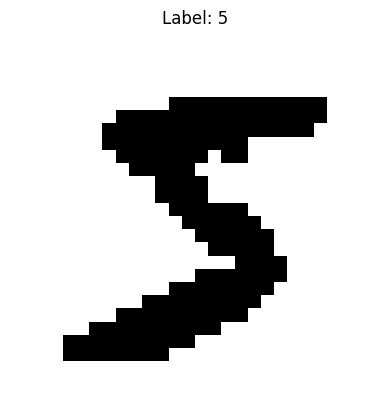

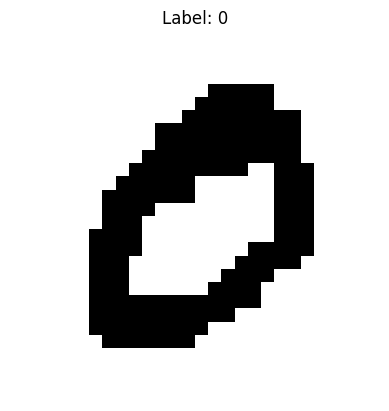

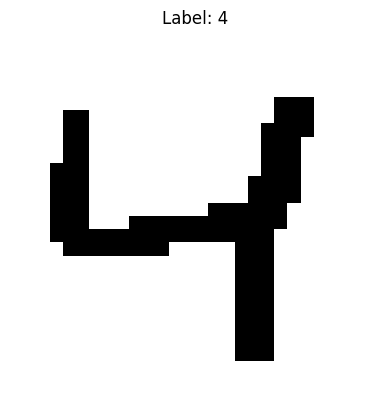

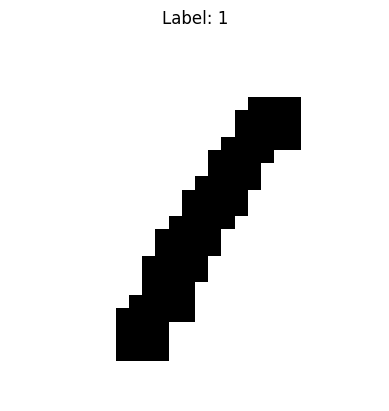

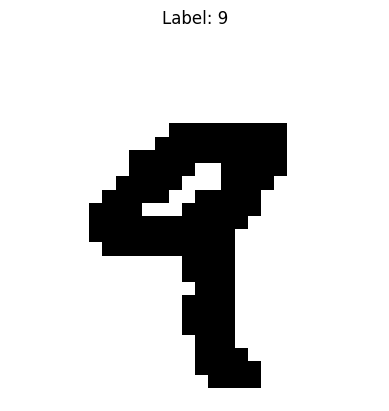

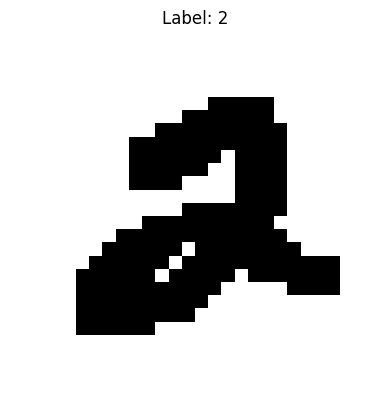

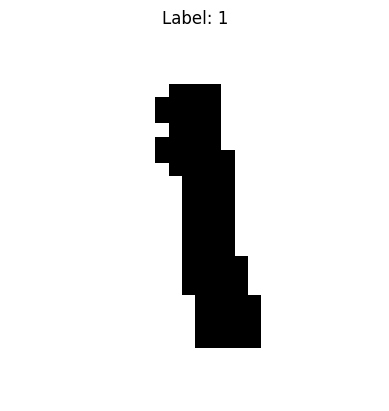

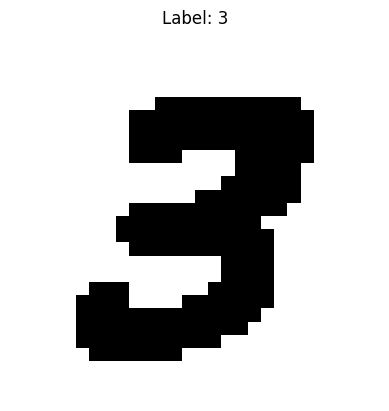

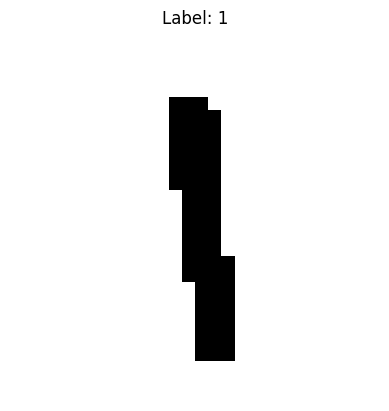

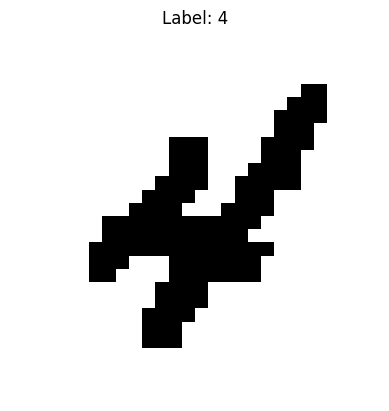

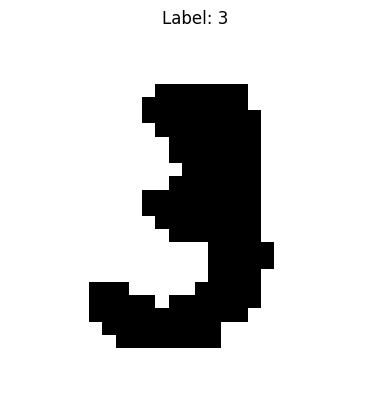

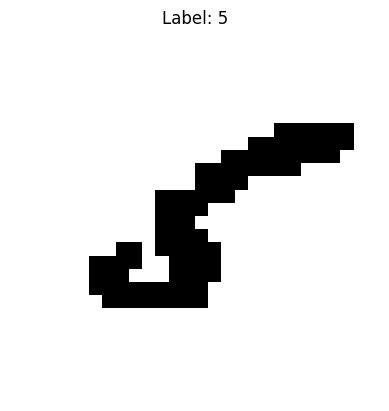

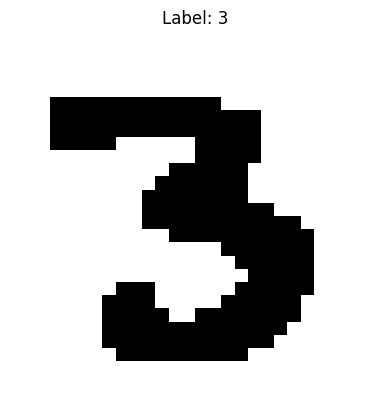

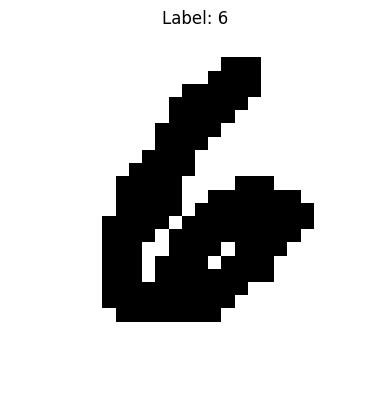

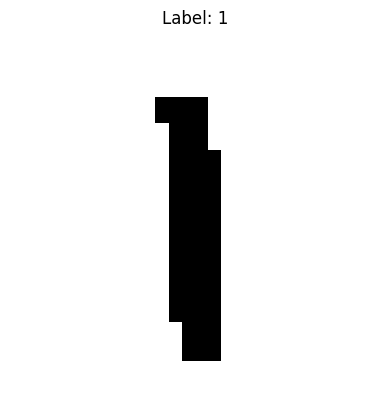

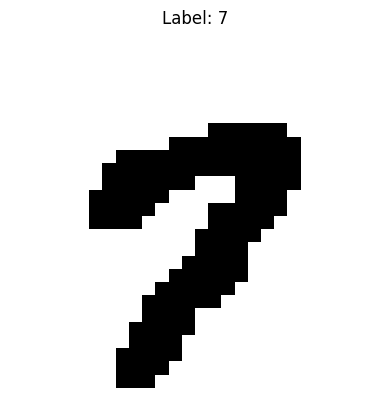

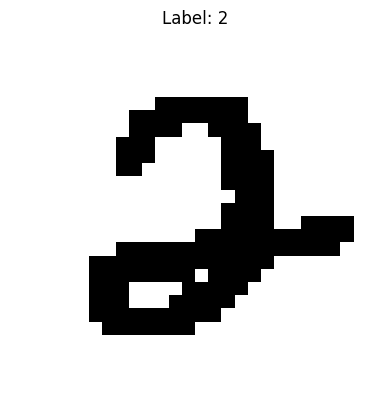

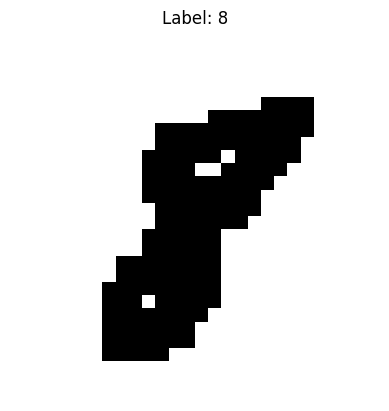

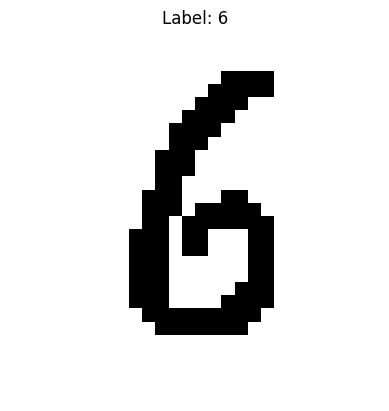

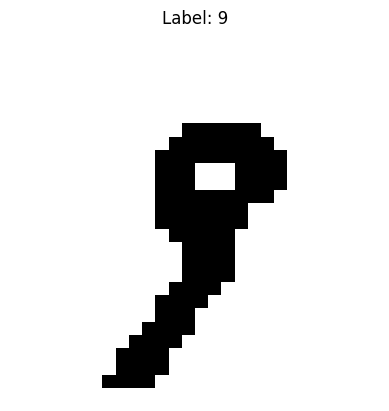

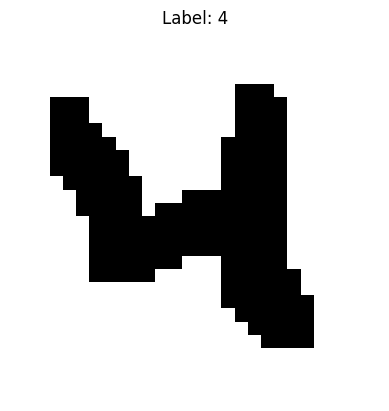

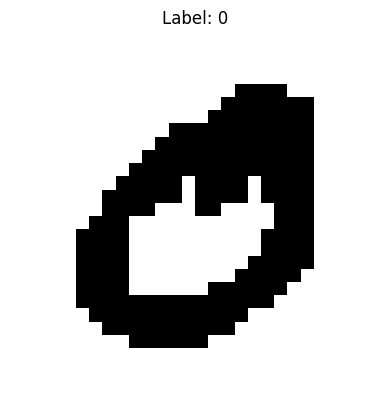

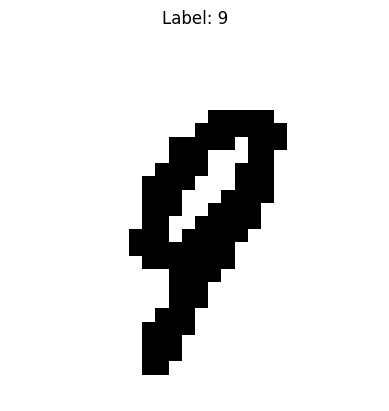

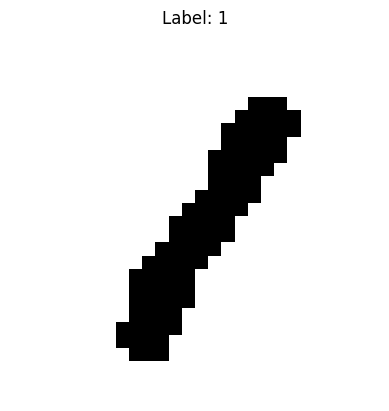

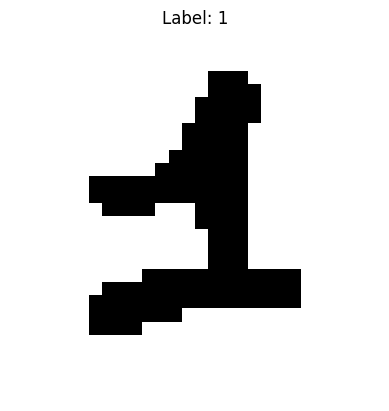

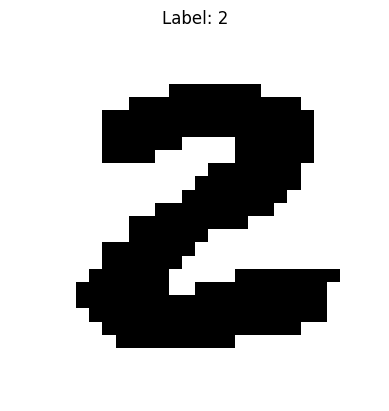

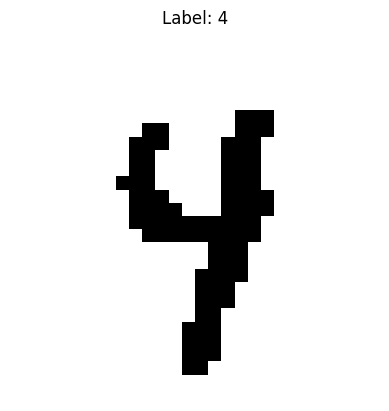

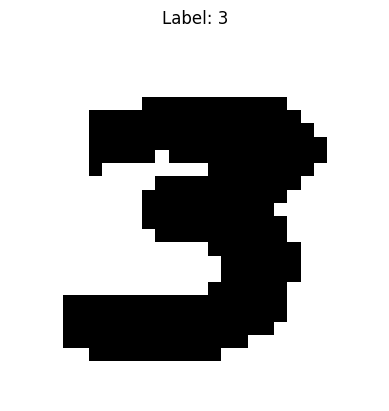

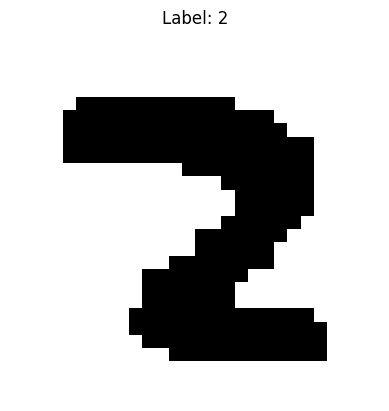

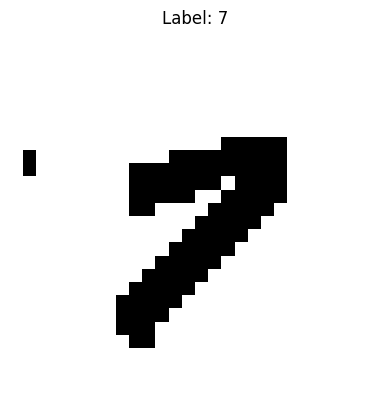

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def get_most_frequent_pixel_value(rgb_image):
    """
    이미지에서 RGB 값을 나열하고 가장 많이 등장하는 값(배경)을 찾습니다.
    """
    reshaped_rgb = rgb_image.reshape(-1, 3)  # 28x28x3 -> 784x3
    unique, counts = np.unique(reshaped_rgb, axis=0, return_counts=True)
    most_frequent_pixel = unique[np.argmax(counts)]
    return most_frequent_pixel

def remove_noise_in_gradient(rgb_image, background_pixel, foreground_pixel, gradient_threshold=50):
    """
    배경과 숫자 사이의 그라데이션 영역을 노이즈로 판단하고 제거합니다.
    """
    reshaped_rgb = rgb_image.reshape(-1, 3)  # 28x28x3 -> 784x3

    # 배경과 숫자 색상 사이의 중간값 영역을 계산
    gradient_range_min = np.array(background_pixel) + gradient_threshold
    gradient_range_max = np.array(foreground_pixel) - gradient_threshold

    # 그라데이션 영역에 해당하는 픽셀을 노이즈로 간주하고 제거
    noise_mask = np.all(reshaped_rgb >= gradient_range_min, axis=1) & np.all(reshaped_rgb <= gradient_range_max, axis=1)

    # 노이즈 부분은 배경으로 설정
    reshaped_rgb[noise_mask] = background_pixel  # 노이즈를 배경으로 설정

    # 다시 이미지로 재구성
    cleaned_rgb_image = reshaped_rgb.reshape(rgb_image.shape)

    return cleaned_rgb_image

def convert_to_binary_image_using_rgb(rgb_image, background_pixel, foreground_pixel):
    """
    RGB 이미지를 이진화하여 배경은 255, 숫자 부분은 0으로 설정합니다.
    """
    # 이미지의 RGB 값을 나열
    reshaped_rgb = rgb_image.reshape(-1, 3)

    # 배경과 다른 픽셀을 구분하여 이진화
    binary_image = np.all(reshaped_rgb == background_pixel, axis=1).astype(np.uint8)

    # 이진 이미지를 28x28 형태로 재구성
    binary_image = binary_image.reshape(28, 28)

    # 배경은 255, 숫자 부분은 0으로 설정
    binary_image = binary_image * 255  # 배경은 255, 숫자 부분은 0

    return binary_image

# 배경과 숫자 이진화된 이미지를 저장할 리스트
binary_dataset = []

# output_images에서 각 이미지를 처리하여 이진화된 이미지를 저장
for final_image, digit_label, _, _ in output_images:
    rgb_image = np.array(final_image.convert("RGB"))

    # 배경과 숫자의 색상 찾기
    background_pixel = get_most_frequent_pixel_value(rgb_image)  # 배경색
    foreground_pixel = (0, 0, 0)  # 숫자 색 (검정색)

    # 노이즈 제거
    cleaned_rgb_image = remove_noise_in_gradient(rgb_image, background_pixel, foreground_pixel)

    # 배경값을 255, 숫자 부분을 0으로 이진화된 이미지 얻기
    binary_image = convert_to_binary_image_using_rgb(cleaned_rgb_image, background_pixel, foreground_pixel)

    # 이진화된 이미지와 레이블을 리스트에 추가
    binary_dataset.append((binary_image, digit_label))

# 결과 샘플 확인
for i in range(30):  # 30개 샘플 출력
    plt.figure()
    plt.imshow(binary_dataset[i][0], cmap="gray")
    plt.axis('off')
    plt.title(f'Label: {binary_dataset[i][1]}')
    plt.show()


#사용할 흑백데이터의 출력 형태 파악

In [ ]:
print(len(binary_dataset))
print(binary_dataset[0])

60000
(array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

#위의 코드까지가 흑백데이터 -> binary_dataset으로 만들었음

#흑백 데이터에 대해 255로 나눔으로 써 minmax스케일링을 진행-> 더하여 8:1:1비율로 train validation test데이터 분할

In [ ]:

import numpy as np



# 데이터 길이
total_len = len(binary_dataset)

# 비율에 따른 분할 인덱스 계산
train_len = int(total_len * 0.8)  # 80%
valid_len = int(total_len * 0.1)  # 10%
test_len = total_len - train_len - valid_len  # 나머지 (10%)

# 데이터 분할
train_data = binary_dataset[:train_len]
valid_data = binary_dataset[train_len:train_len + valid_len]
test_data = binary_dataset[train_len + valid_len:]

# 픽셀 값을 255로 나누어 정규화
def normalize_data(dataset):
    images = []
    labels = []
    for image, label in dataset:
        images.append(np.array(image) / 255.0)  # 이미지 데이터를 255로 나누어 정규화
        labels.append(label)  # 레이블은 그대로 추가
    return np.array(images), np.array(labels)

# 전처리 안한 데이터
def original_data(dataset):
    images = []
    labels = []
    for image, label in dataset:
        images.append(np.array(image))
        labels.append(label)  # 레이블은 그대로 추가
    return np.array(images), np.array(labels)






# 정규화 안된 데이터셋 생성
X_train_or, y_train_or = original_data(train_data)
X_valid_or, y_valid_or = original_data(valid_data)
X_test_or, y_test_or = original_data(test_data)

# 정규화된 데이터셋 생성
X_train, y_train = normalize_data(train_data)
X_valid, y_valid = normalize_data(valid_data)
X_test, y_test = normalize_data(test_data)


# 결과 확인
print(f"Train data shape: {X_train.shape}, Validation data shape: {X_valid.shape}, Test data shape: {X_test.shape}")
print("Example normalized pixel values (Train):", X_train[0])  # 첫 번째 이미지의 정규화된 값 확인
print("Example label (Train):", y_train[0])  # 첫 번째 이미지의 레이블 확인


Train data shape: (48000, 28, 28), Validation data shape: (6000, 28, 28), Test data shape: (6000, 28, 28)
Example normalized pixel values (Train): [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.

#minmax 사용전 accuracy 조사

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import time



# 여러 가지 모델을 리스트로 정의
models = {
    "SGDClassifier": SGDClassifier(max_iter=1000, tol=1e-3),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC (Support Vector Classifier)": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}

# 모델 학습 및 정확도 계산
for model_name, model in models.items():
    # 모델 학습
    # 시작 시간
    start_time = time.perf_counter()

    model.fit(X_train_or.reshape(X_train_or.shape[0], -1), y_train_or)
    # 끝 시간
    end_time = time.perf_counter()
    print(f"training time for {model_name} : {end_time - start_time} seconds")
    # 예측
    y_pred = model.predict(X_test_or.reshape(X_test_or.shape[0], -1))

    # 정확도 계산
    accuracy = accuracy_score(y_test_or, y_pred)

    # 결과 출력
    print(f"{model_name} Test Accuracy: {accuracy * 100:.2f}%")


training time for SGDClassifier : 145.6234210699995 seconds
SGDClassifier Test Accuracy: 89.17%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training time for LogisticRegression : 287.99325809400034 seconds
LogisticRegression Test Accuracy: 91.98%
training time for SVC (Support Vector Classifier) : 218.1159838169997 seconds
SVC (Support Vector Classifier) Test Accuracy: 97.88%
training time for RandomForestClassifier : 20.157280682999954 seconds
RandomForestClassifier Test Accuracy: 97.43%
training time for KNeighborsClassifier : 0.006174054000439355 seconds
KNeighborsClassifier Test Accuracy: 96.95%


#위와 같이 데이터 픽셀 사이의 차이값이 크게 나타나기 때문에 logistic regression의 경우 iteration이 수렴값에 다다르지 못하게 된다. 따라서 데이터의 스케일을 minmax 스케일을 통해 줄임으로써 이 문제를 해결하고 성능향상을 기대했습니다.


#minmax스케일링된 데이터를 바탕으로 5개의 대표적인 머신러닝 모델을 default parameter로 학습 및 accuracy값 조사

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import time



# 여러 가지 모델을 리스트로 정의
models = {
    "SGDClassifier": SGDClassifier(max_iter=1000, tol=1e-3),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC (Support Vector Classifier)": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}

# 모델 학습 및 정확도 계산
for model_name, model in models.items():
    # 모델 학습
    # 시작 시간
    start_time = time.perf_counter()

    model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    # 끝 시간
    end_time = time.perf_counter()
    print(f"training time for {model_name} : {end_time - start_time} seconds")
    # 예측
    y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)

    # 결과 출력
    print(f"{model_name} Test Accuracy: {accuracy * 100:.2f}%")


training time for SGDClassifier : 53.85518376299933 seconds
SGDClassifier Test Accuracy: 91.08%
training time for LogisticRegression : 216.6310448459999 seconds
LogisticRegression Test Accuracy: 92.53%
training time for SVC (Support Vector Classifier) : 219.25830482499987 seconds
SVC (Support Vector Classifier) Test Accuracy: 97.88%
training time for RandomForestClassifier : 23.690300102000037 seconds
RandomForestClassifier Test Accuracy: 97.38%
training time for KNeighborsClassifier : 0.04055990100005147 seconds
KNeighborsClassifier Test Accuracy: 96.97%


#위를 보면 성능이 향상되고 logistic regression도 안정적으로 값이 나오는걸 확인할 수 있습니다.

#데이터 센터링을 이용해 데이터 전처리

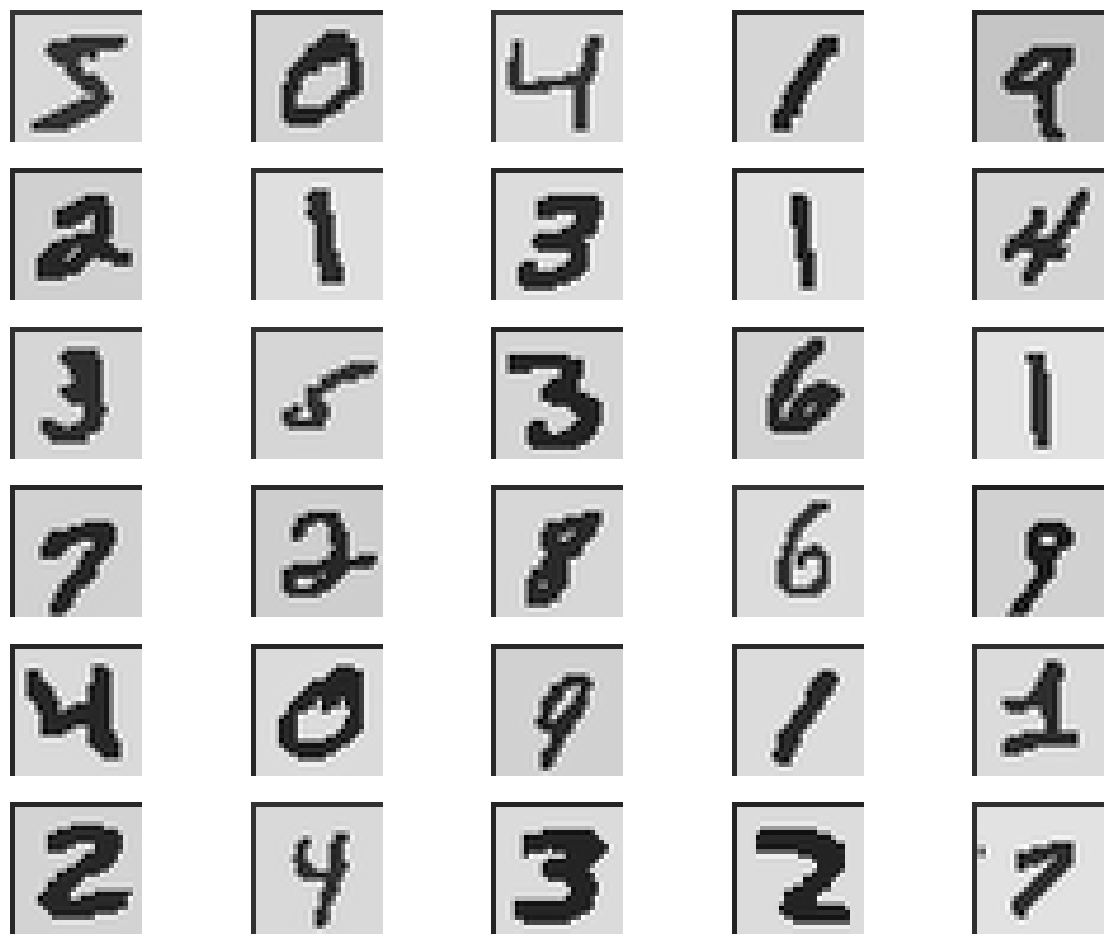

Train: 48000, Validation: 6000, Test: 6000


In [ ]:
import random
import numpy as np
from scipy.ndimage import center_of_mass
from scipy.ndimage import shift
import matplotlib.pyplot as plt


# 데이터 길이
total_len = len(binary_dataset)

# 비율에 따른 분할 인덱스 계산
train_len = int(total_len * 0.8)  # 80%
valid_len = int(total_len * 0.1)  # 10%
test_len = total_len - train_len - valid_len  # 나머지 (10%)

# 데이터 분할
train_data = binary_dataset[:train_len]
valid_data = binary_dataset[train_len:train_len + valid_len]
test_data = binary_dataset[train_len + valid_len:]

# 픽셀 값을 255로 나누어 정규화
def normalize_data(dataset):
    normalized_dataset = [
        (np.array(image) / 255.0, label)  # 이미지 데이터를 255로 나누고, 레이블은 그대로 둠
        for image, label in dataset
    ]
    return normalized_dataset

# 정규화된 데이터셋 생성
train_data_normalized = normalize_data(train_data)
valid_data_normalized = normalize_data(valid_data)
test_data_normalized = normalize_data(test_data)

# 센터링 함수 정의
def center_image(image):
    """
    이미지의 무게 중심을 계산하고 중앙으로 이동시킴.
    """
    cy, cx = center_of_mass(image)  # 무게 중심 계산
    shift_y, shift_x = (14 - cy, 14 - cx)  # 중앙 (14, 14)로 이동할 거리 계산
    centered_image = shift(image, shift=(shift_y, shift_x), mode='constant', cval=0.0)
    return centered_image

# 센터링 적용 함수
def preprocess_images_centering_only(images):
    """
    이미지 데이터에 센터링만 적용.
    """
    processed_images = []
    for img, label in images:
        centered = center_image(img)  # 이미지 센터링
        processed_images.append((centered, label))  # 센터링된 이미지와 레이블을 함께 저장
    return processed_images

# 훈련, 검증, 테스트 데이터에 센터링 적용
train_data_centered = preprocess_images_centering_only(train_data_normalized)
valid_data_centered = preprocess_images_centering_only(valid_data_normalized)
test_data_centered = preprocess_images_centering_only(test_data_normalized)

# 결과 확인 (30개 샘플 이미지 출력)
plt.figure(figsize=(15, 12))
for i in range(30):
    plt.subplot(6, 5, i + 1)  # 6행 5열로 30개 이미지를 배치
    plt.imshow(train_data_centered[i][0], cmap='gray')
    plt.axis('off')
plt.show()

# 결과 출력
print(f"Train: {len(train_data_centered)}, Validation: {len(valid_data_centered)}, Test: {len(test_data_centered)}")


In [ ]:
# 데이터 분리 함수: 이미지와 레이블을 분리해서 X와 y로 반환
def split_data(data):
    X = np.array([img for img, label in data])  # 이미지 데이터를 X로
    y = np.array([label for img, label in data])  # 레이블 데이터를 y로
    return X, y

# 훈련, 검증, 테스트 데이터 분리
X_train, y_train = split_data(train_data_centered)
X_valid, y_valid = split_data(valid_data_centered)
X_test, y_test = split_data(test_data_centered)

# 결과 확인 (모델 학습에 필요한 데이터 형태)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (48000, 28, 28), y_train shape: (48000,)
X_valid shape: (6000, 28, 28), y_valid shape: (6000,)
X_test shape: (6000, 28, 28), y_test shape: (6000,)


In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import time



# 여러 가지 모델을 리스트로 정의
models = {
    "SGDClassifier": SGDClassifier(max_iter=1000, tol=1e-3),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC (Support Vector Classifier)": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}

# 모델 학습 및 정확도 계산
for model_name, model in models.items():
    # 모델 학습
    # 시작 시간
    start_time = time.perf_counter()

    model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    # 끝 시간
    end_time = time.perf_counter()
    print(f"training time for {model_name} : {end_time - start_time} seconds")
    # 예측
    y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)

    # 결과 출력
    print(f"{model_name} Test Accuracy: {accuracy * 100:.2f}%")


training time for SGDClassifier : 54.617921413999284 seconds
SGDClassifier Test Accuracy: 91.32%
training time for LogisticRegression : 207.35945598999933 seconds
LogisticRegression Test Accuracy: 92.08%
training time for SVC (Support Vector Classifier) : 214.83407864700075 seconds
SVC (Support Vector Classifier) Test Accuracy: 97.75%
training time for RandomForestClassifier : 271.8305461539994 seconds
RandomForestClassifier Test Accuracy: 96.22%
training time for KNeighborsClassifier : 0.06574930300030246 seconds
KNeighborsClassifier Test Accuracy: 96.98%


#위 결과에 따라 데이터 센터링으로 전처리를 시행하고 데이터의 accuracy를 구하였을 때 출력되어지는 이미지와 accuracy를 보았을 때 전후가 변화가 크지 않고 accuracy가 즉 성능이 떨어지는 모습을 볼 수 있다. 이 경우는 이미 센터링이 되어있는 데이터를 또한번 작업을 진행함으로써 생겨난 성능의 저하라고 판단하였습니다.

In [ ]:

import numpy as np



# 데이터 길이
total_len = len(binary_dataset)

# 비율에 따른 분할 인덱스 계산
train_len = int(total_len * 0.8)  # 80%
valid_len = int(total_len * 0.1)  # 10%
test_len = total_len - train_len - valid_len  # 나머지 (10%)

# 데이터 분할
train_data = binary_dataset[:train_len]
valid_data = binary_dataset[train_len:train_len + valid_len]
test_data = binary_dataset[train_len + valid_len:]

# 픽셀 값을 255로 나누어 정규화
def normalize_data(dataset):
    images = []
    labels = []
    for image, label in dataset:
        images.append(np.array(image) / 255.0)  # 이미지 데이터를 255로 나누어 정규화
        labels.append(label)  # 레이블은 그대로 추가
    return np.array(images), np.array(labels)



# 정규화된 데이터셋 생성
X_train, y_train = normalize_data(train_data)
X_valid, y_valid = normalize_data(valid_data)
X_test, y_test = normalize_data(test_data)


# 결과 확인
print(f"Train data shape: {X_train.shape}, Validation data shape: {X_valid.shape}, Test data shape: {X_test.shape}")
print("Example normalized pixel values (Train):", X_train[0])  # 첫 번째 이미지의 정규화된 값 확인
print("Example label (Train):", y_train[0])  # 첫 번째 이미지의 레이블 확인


Train data shape: (48000, 28, 28), Validation data shape: (6000, 28, 28), Test data shape: (6000, 28, 28)
Example normalized pixel values (Train): [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.

#따라서 바로 위의 minmax로 스케일링한 train test validation을 최종적으로 숫자 분류기 데이터 셋으로 결정하였습니다.

#이어서 데이터 증강 부분은 기존48000개의 학습 데이터에 대해서 -30~30도 사이의 각을 지정하여 돌림으로써 데이터를 증강하도록 생각했습니다.

In [ ]:
from PIL import Image
import random
import numpy as np

# 데이터 증강 함수: 이미지를 랜덤 각도로 회전
def augment_data(dataset, num_augmentations):
    augmented_data = []
    while len(augmented_data) < num_augmentations:
        for image, label in dataset:
            # PIL 이미지로 변환
            pil_image = Image.fromarray(image)
            # 랜덤 각도 선택 (-30도 ~ +30도, 0도 제외)
            angle = random.choice([i for i in range(-30, 31) if i != 0])
            # 이미지 회전 (expand=True는 이미지 크기를 유지)
            rotated_image = pil_image.rotate(angle, resample=Image.BICUBIC, fillcolor=255)  # 흰색 배경
            # 다시 numpy 배열로 변환
            rotated_image_array = np.array(rotated_image, dtype=np.uint8)
            # 증강된 데이터 추가
            augmented_data.append((rotated_image_array, label))
            if len(augmented_data) >= num_augmentations:
                break
    return augmented_data

# 증강 데이터 생성
num_augmentations = 48000
augmented_train_data = augment_data(train_data, num_augmentations)

# 기존 데이터와 증강 데이터를 합치기
train_data_augmented = train_data + augmented_train_data

# 정규화된 학습 데이터 생성
train_data_normalized = normalize_data(train_data_augmented)

# 결과 확인
print(f"Original Train Data: {len(train_data)}, Augmented Train Data: {len(augmented_train_data)}, Total Train Data: {len(train_data_augmented)}")
print("Example normalized pixel values (Augmented):", train_data_normalized[0][0])


Original Train Data: 48000, Augmented Train Data: 48000, Total Train Data: 96000
Example normalized pixel values (Augmented): [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1.

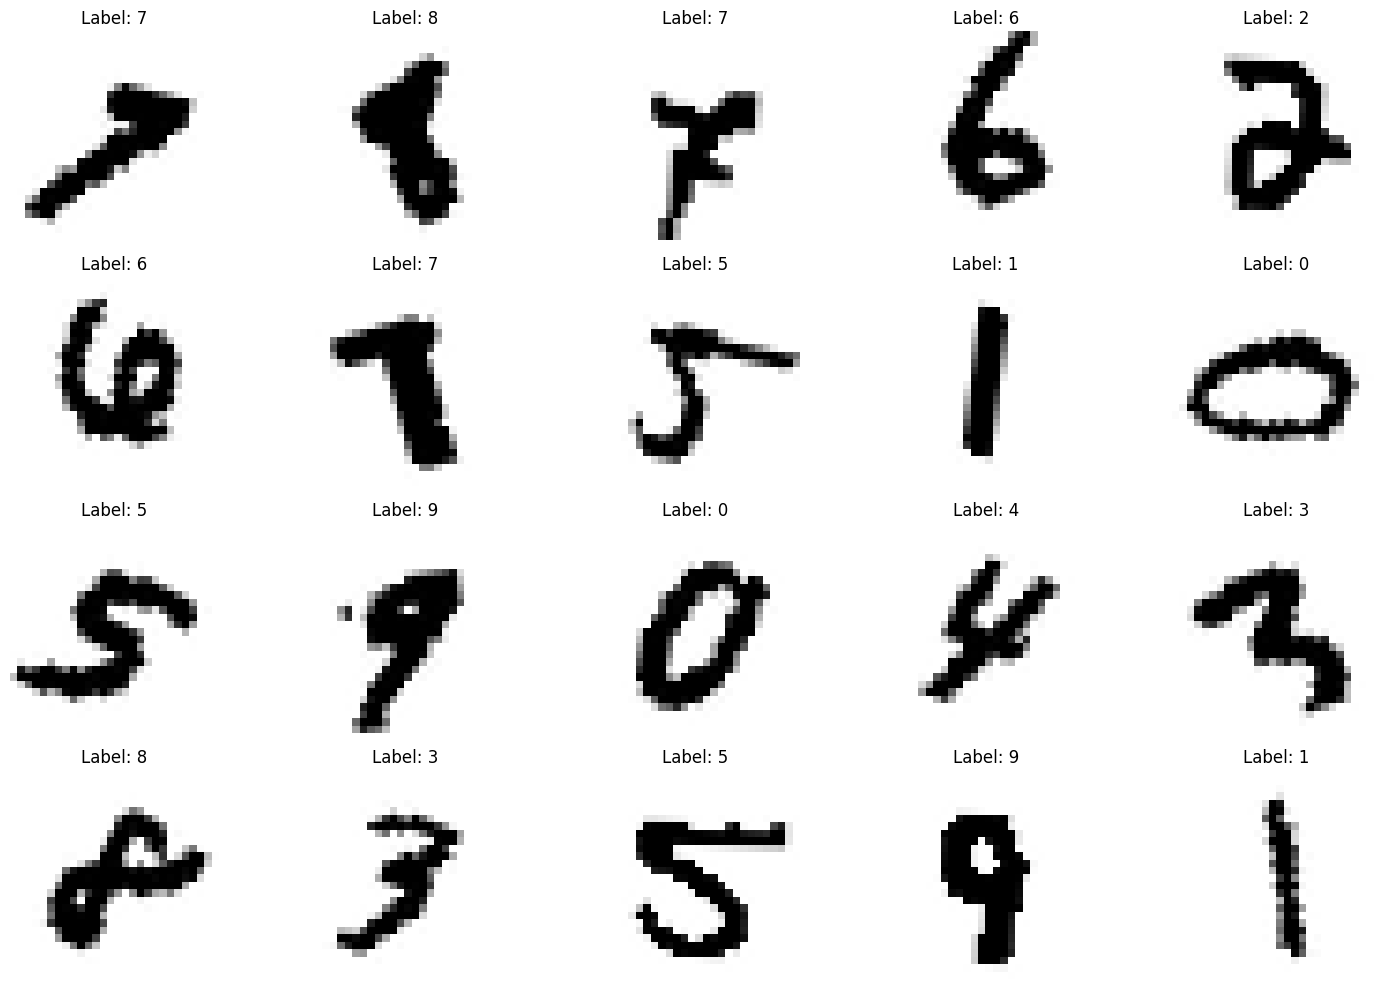

In [ ]:
import matplotlib.pyplot as plt

# 회전된 이미지 시각화 함수
def visualize_augmented_data(dataset, num_images=20):
    plt.figure(figsize=(15, 10))  # 너비 15, 높이 10 설정
    rows = (num_images // 5) + (1 if num_images % 5 != 0 else 0)  # 5개씩 한 줄에 배치
    for i in range(num_images):
        image, label = random.choice(dataset)
        plt.subplot(rows, 5, i + 1)  # (행, 열, 인덱스)
        plt.imshow(image, cmap="gray")
        plt.title(f"Label: {label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# 회전된 데이터 시각화
visualize_augmented_data(augmented_train_data, num_images=20)


#위의 경우 코드상에서 0도를 제외 함으로써 데이터의 중복을 막으면서 48000개의 회전 데이터를 기존 train 데이터에 추가하는 작업을 진행했습니다.

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import time



import numpy as np



# 픽셀 값을 255로 나누어 정규화
def normalize_data(dataset):
    images = []
    labels = []
    for image, label in dataset:
        images.append(np.array(image) / 255.0)  # 이미지 데이터를 255로 나누어 정규화
        labels.append(label)  # 레이블은 그대로 추가
    return np.array(images), np.array(labels)

# 정규화된 데이터셋 생성
X_train,y_train = normalize_data(train_data_augmented)

X_valid, y_valid = normalize_data(valid_data)
X_test, y_test = normalize_data(test_data)

# 결과 확인
print(f"Train data shape: {X_train.shape},Validation data shape: {X_valid.shape}, Test data shape: {X_test.shape}")




# 여러 가지 모델을 리스트로 정의
models = {
    "SGDClassifier": SGDClassifier(max_iter=1000, tol=1e-3),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC (Support Vector Classifier)": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}

# 모델 학습 및 정확도 계산
for model_name, model in models.items():
    # 모델 학습
    # 시작 시간
    start_time = time.perf_counter()

    model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    # 끝 시간
    end_time = time.perf_counter()
    print(f"training time for {model_name} : {end_time - start_time} seconds")
    # 예측
    y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)

    # 결과 출력
    print(f"{model_name} Test Accuracy: {accuracy * 100:.2f}%")


Train data shape: (96000, 28, 28),Validation data shape: (6000, 28, 28), Test data shape: (6000, 28, 28)
training time for SGDClassifier : 59.88875307500007 seconds
SGDClassifier Test Accuracy: 89.07%
training time for LogisticRegression : 291.98570519500004 seconds
LogisticRegression Test Accuracy: 91.30%
training time for SVC (Support Vector Classifier) : 522.3385725640001 seconds
SVC (Support Vector Classifier) Test Accuracy: 98.27%
training time for RandomForestClassifier : 49.713202163000005 seconds
RandomForestClassifier Test Accuracy: 97.53%
training time for KNeighborsClassifier : 0.041827160000138974 seconds
KNeighborsClassifier Test Accuracy: 97.10%


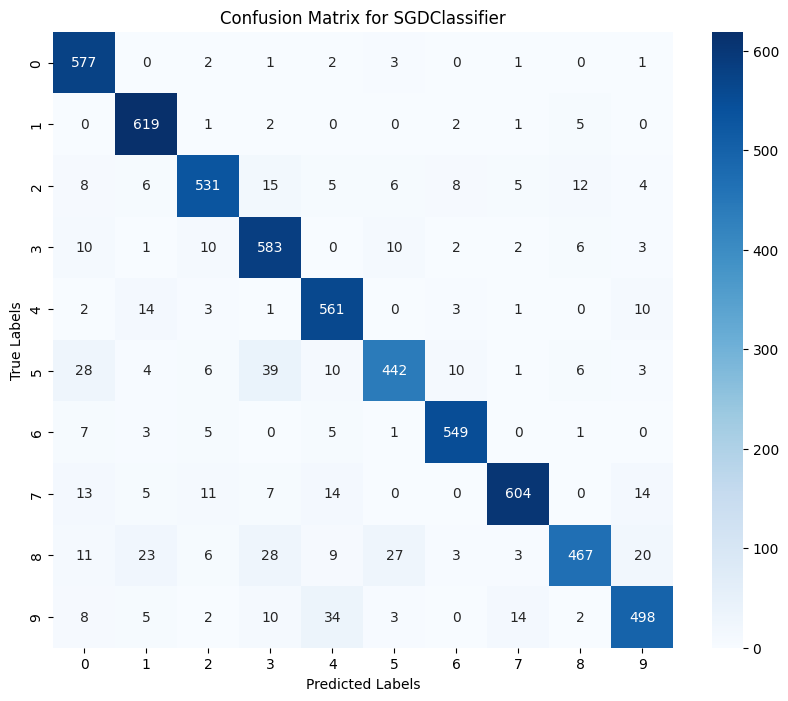

SGDClassifier - Top 3 Misclassified Classes:
Class 8: 130 misclassifications (Samples)
Class 5: 107 misclassifications (Samples)
Class 9: 78 misclassifications (Samples)
SGDClassifier - Class 0 Misclassification Rate: 0.02
SGDClassifier - Class 1 Misclassification Rate: 0.02
SGDClassifier - Class 2 Misclassification Rate: 0.12
SGDClassifier - Class 3 Misclassification Rate: 0.07
SGDClassifier - Class 4 Misclassification Rate: 0.06
SGDClassifier - Class 5 Misclassification Rate: 0.19
SGDClassifier - Class 6 Misclassification Rate: 0.04
SGDClassifier - Class 7 Misclassification Rate: 0.10
SGDClassifier - Class 8 Misclassification Rate: 0.22
SGDClassifier - Class 9 Misclassification Rate: 0.14


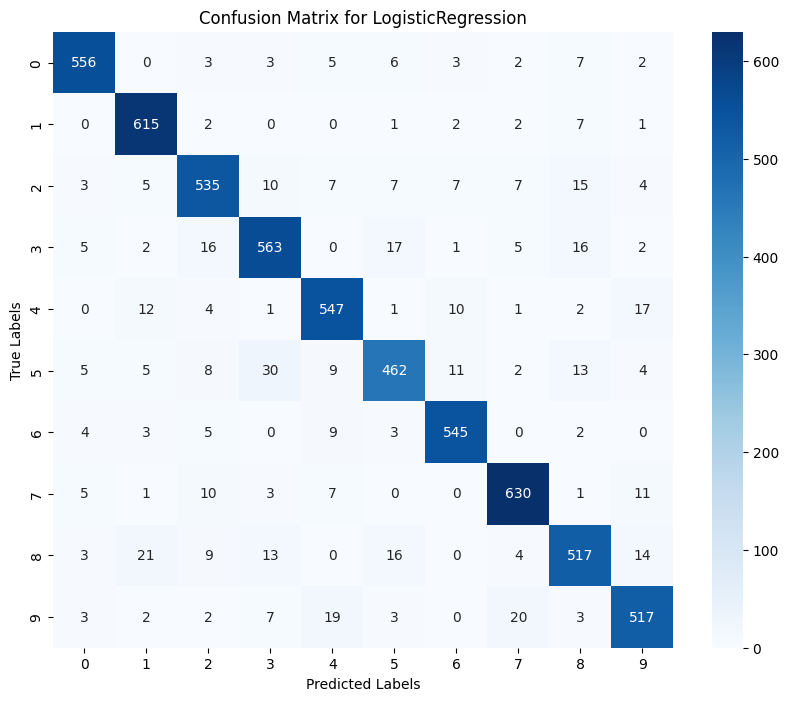

LogisticRegression - Top 3 Misclassified Classes:
Class 5: 87 misclassifications (Samples)
Class 8: 80 misclassifications (Samples)
Class 2: 65 misclassifications (Samples)
LogisticRegression - Class 0 Misclassification Rate: 0.05
LogisticRegression - Class 1 Misclassification Rate: 0.02
LogisticRegression - Class 2 Misclassification Rate: 0.11
LogisticRegression - Class 3 Misclassification Rate: 0.10
LogisticRegression - Class 4 Misclassification Rate: 0.08
LogisticRegression - Class 5 Misclassification Rate: 0.16
LogisticRegression - Class 6 Misclassification Rate: 0.05
LogisticRegression - Class 7 Misclassification Rate: 0.06
LogisticRegression - Class 8 Misclassification Rate: 0.13
LogisticRegression - Class 9 Misclassification Rate: 0.10


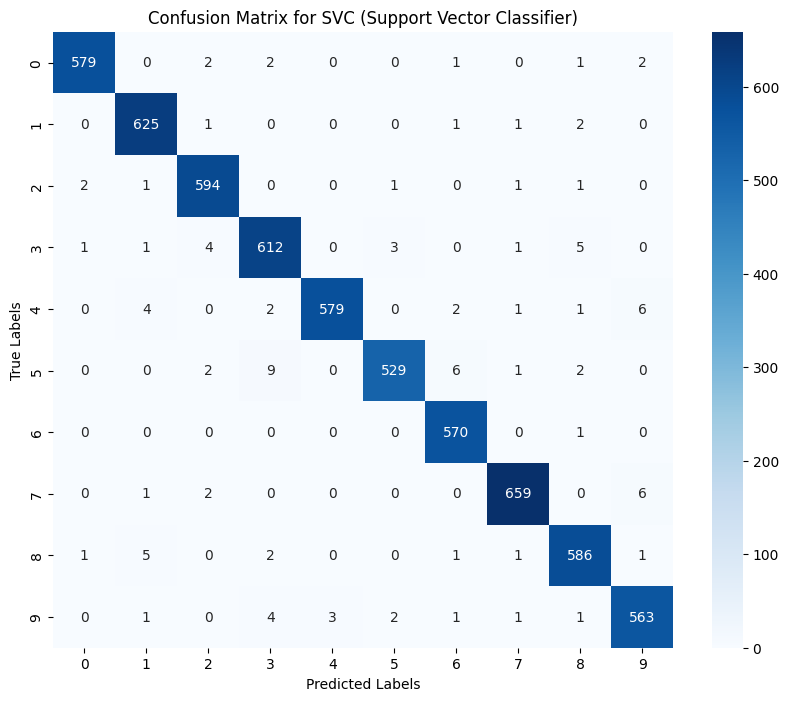

SVC (Support Vector Classifier) - Top 3 Misclassified Classes:
Class 5: 20 misclassifications (Samples)
Class 4: 16 misclassifications (Samples)
Class 3: 15 misclassifications (Samples)
SVC (Support Vector Classifier) - Class 0 Misclassification Rate: 0.01
SVC (Support Vector Classifier) - Class 1 Misclassification Rate: 0.01
SVC (Support Vector Classifier) - Class 2 Misclassification Rate: 0.01
SVC (Support Vector Classifier) - Class 3 Misclassification Rate: 0.02
SVC (Support Vector Classifier) - Class 4 Misclassification Rate: 0.03
SVC (Support Vector Classifier) - Class 5 Misclassification Rate: 0.04
SVC (Support Vector Classifier) - Class 6 Misclassification Rate: 0.00
SVC (Support Vector Classifier) - Class 7 Misclassification Rate: 0.01
SVC (Support Vector Classifier) - Class 8 Misclassification Rate: 0.02
SVC (Support Vector Classifier) - Class 9 Misclassification Rate: 0.02


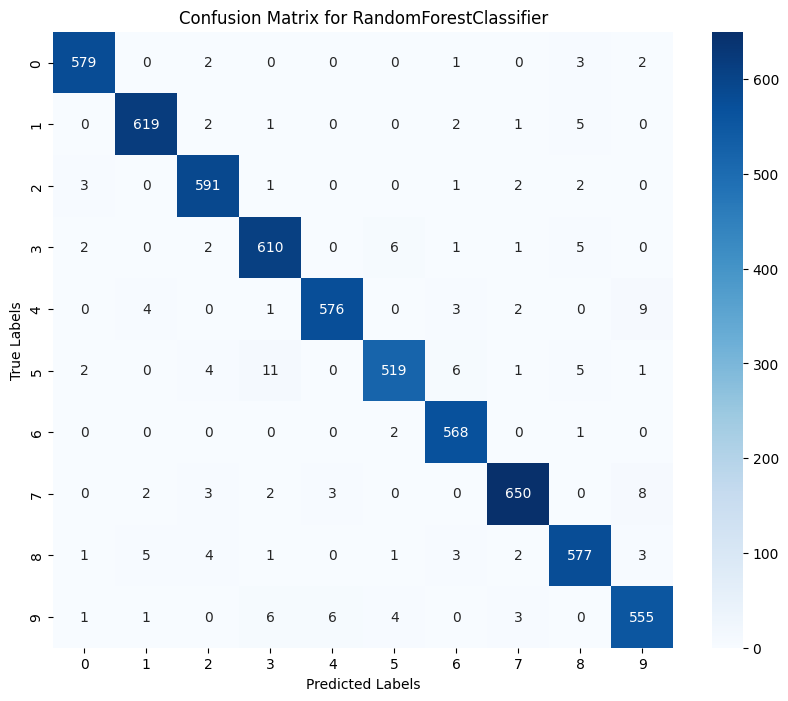

RandomForestClassifier - Top 3 Misclassified Classes:
Class 5: 30 misclassifications (Samples)
Class 9: 21 misclassifications (Samples)
Class 8: 20 misclassifications (Samples)
RandomForestClassifier - Class 0 Misclassification Rate: 0.01
RandomForestClassifier - Class 1 Misclassification Rate: 0.02
RandomForestClassifier - Class 2 Misclassification Rate: 0.01
RandomForestClassifier - Class 3 Misclassification Rate: 0.03
RandomForestClassifier - Class 4 Misclassification Rate: 0.03
RandomForestClassifier - Class 5 Misclassification Rate: 0.05
RandomForestClassifier - Class 6 Misclassification Rate: 0.01
RandomForestClassifier - Class 7 Misclassification Rate: 0.03
RandomForestClassifier - Class 8 Misclassification Rate: 0.03
RandomForestClassifier - Class 9 Misclassification Rate: 0.04


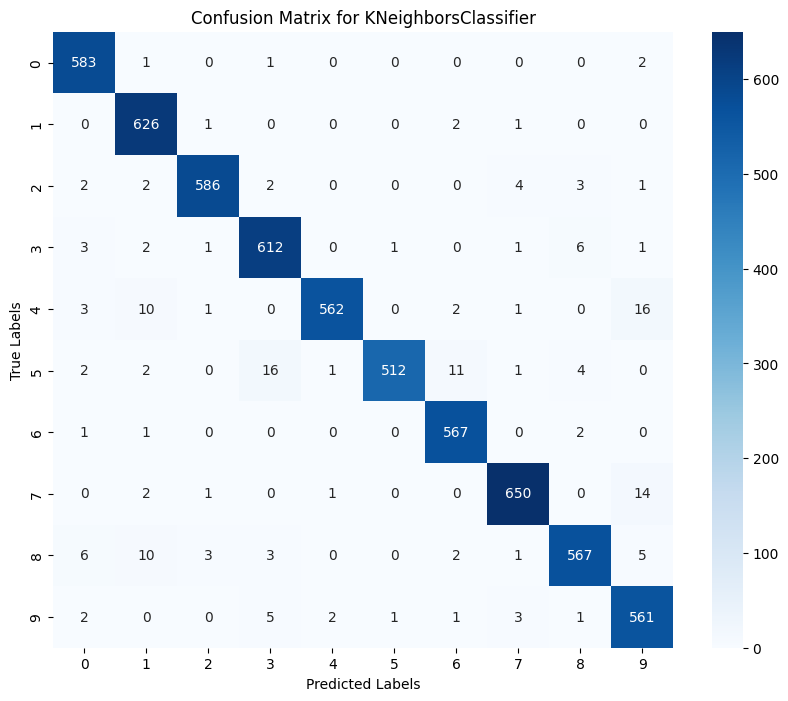

KNeighborsClassifier - Top 3 Misclassified Classes:
Class 5: 37 misclassifications (Samples)
Class 4: 33 misclassifications (Samples)
Class 8: 30 misclassifications (Samples)
KNeighborsClassifier - Class 0 Misclassification Rate: 0.01
KNeighborsClassifier - Class 1 Misclassification Rate: 0.01
KNeighborsClassifier - Class 2 Misclassification Rate: 0.02
KNeighborsClassifier - Class 3 Misclassification Rate: 0.02
KNeighborsClassifier - Class 4 Misclassification Rate: 0.06
KNeighborsClassifier - Class 5 Misclassification Rate: 0.07
KNeighborsClassifier - Class 6 Misclassification Rate: 0.01
KNeighborsClassifier - Class 7 Misclassification Rate: 0.03
KNeighborsClassifier - Class 8 Misclassification Rate: 0.05
KNeighborsClassifier - Class 9 Misclassification Rate: 0.03


In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np

# 모델 학습 및 Confusion Matrix 시각화
# 여러 가지 모델을 리스트로 정의
models = {
    "SGDClassifier": SGDClassifier(max_iter=1000, tol=1e-3),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC (Support Vector Classifier)": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}
for model_name, model in models.items():
    # 모델 학습
    model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

    # 예측
    y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

    # Confusion Matrix 계산
    cm = confusion_matrix(y_test, y_pred)

    # Confusion Matrix 시각화 (Heatmap 사용)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # 각 클래스의 오분류 개수 계산 및 상위 3개 추출
    misclassification_counts = {}
    for i in range(cm.shape[0]):  # 각 클래스에 대해
        misclassification = cm[i, :].sum() - cm[i, i]  # 해당 클래스의 잘못 분류된 항목
        misclassification_counts[i] = misclassification

    # 오분류 상위 3개 클래스 추출
    top_misclassified = sorted(misclassification_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"{model_name} - Top 3 Misclassified Classes:")
    for cls, count in top_misclassified:
        print(f"Class {cls}: {count} misclassifications (Samples)")

    # 각 클래스의 오분류 비율 출력
    for i in range(cm.shape[0]):  # 각 클래스에 대해
        misclassification = cm[i, :].sum() - cm[i, i]  # 해당 클래스의 잘못 분류된 항목
        total = cm[i, :].sum()  # 해당 클래스의 총 예측 개수
        misclassification_rate = misclassification / total if total != 0 else 0
        print(f"{model_name} - Class {i} Misclassification Rate: {misclassification_rate:.2f}")


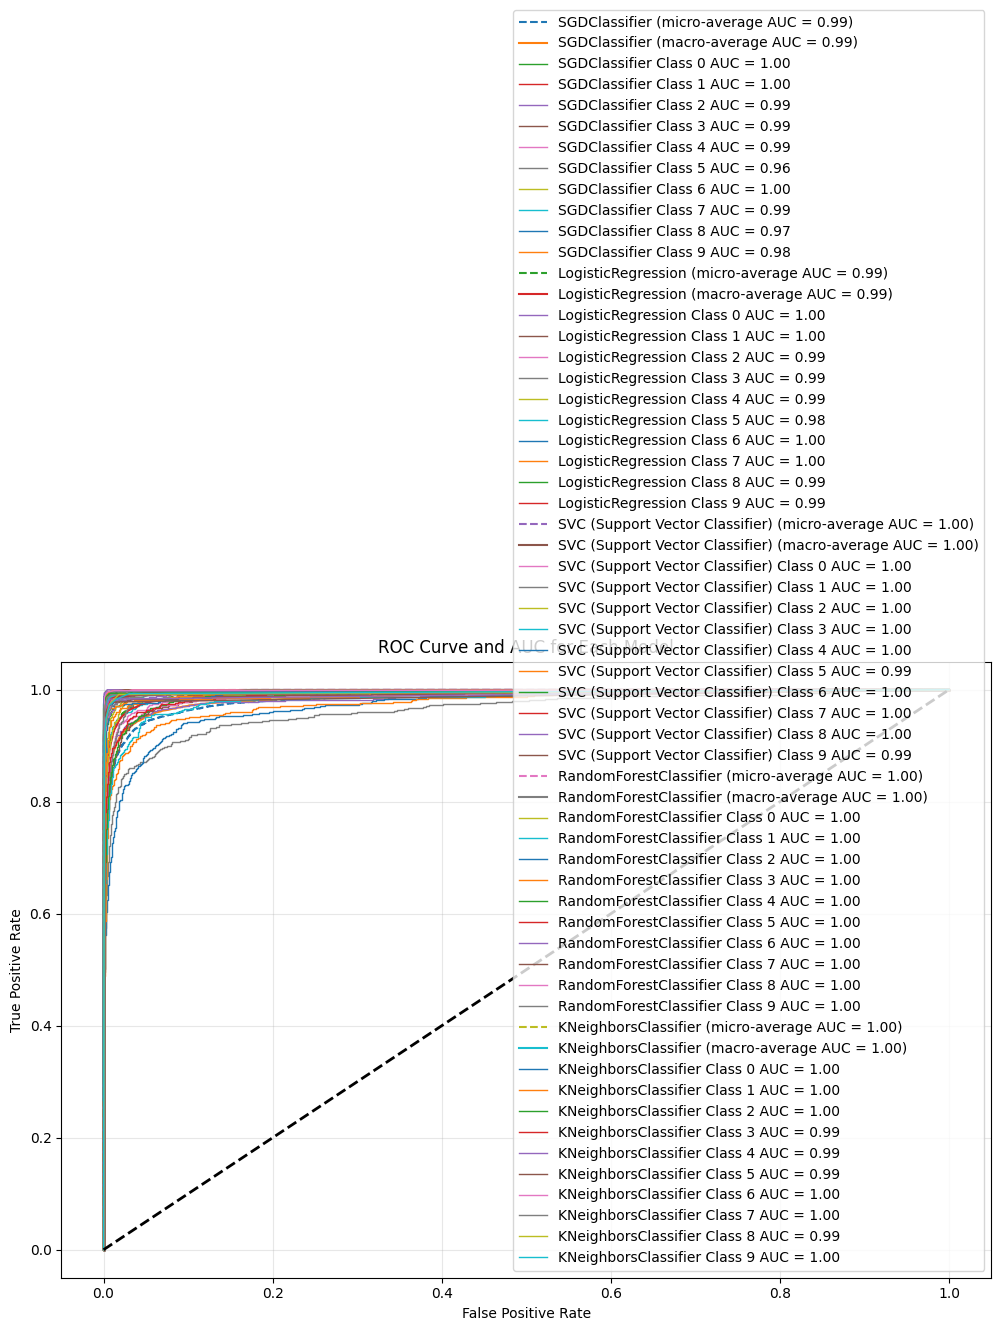

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import auc

# y_test를 One-hot Encoding으로 변환
n_classes = len(np.unique(y_test))  # 클래스 개수
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# 모델별 ROC 곡선 및 AUC 계산 및 시각화
plt.figure(figsize=(12, 8))

for model_name, model in models.items():
    # 모델 학습
    model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

    # 예측 (확률값 반환)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test.reshape(X_test.shape[0], -1))
    else:
        y_score = model.decision_function(X_test.reshape(X_test.shape[0], -1))
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())  # 스케일링

    # 각 클래스에 대해 ROC 곡선 및 AUC 계산
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # micro-averaged ROC 곡선 및 AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # macro-averaged ROC 곡선 및 AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # ROC 곡선 시각화
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f'{model_name} (micro-average AUC = {roc_auc["micro"]:.2f})',
        linestyle='--',
    )
    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f'{model_name} (macro-average AUC = {roc_auc["macro"]:.2f})',
        linestyle='-',
    )

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=1, label=f'{model_name} Class {i} AUC = {roc_auc[i]:.2f}')

# 그래프 꾸미기
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve and AUC for Each Model')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [ ]:
print("\n모델별 평균 AUC:")
for model_name, model in models.items():
    # 모델 학습
    model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

    # 예측 (확률값 반환)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test.reshape(X_test.shape[0], -1))
    else:
        y_score = model.decision_function(X_test.reshape(X_test.shape[0], -1))
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())  # 스케일링

    # 각 클래스에 대해 ROC 곡선 및 AUC 계산
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # micro 및 macro AUC 계산
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # AUC 출력
    class_auc_avg = np.mean([roc_auc[i] for i in range(n_classes)])
    print(f"{model_name}: Class-wise 평균 AUC = {class_auc_avg:.5f}")
    print(f"{model_name}: Micro-average AUC = {roc_auc['micro']:.5f}")
    print(f"{model_name}: Macro-average AUC = {roc_auc['macro']:.5f}\n")



모델별 평균 AUC:
SGDClassifier: Class-wise 평균 AUC = 0.98694
SGDClassifier: Micro-average AUC = 0.98764
SGDClassifier: Macro-average AUC = 0.98702

LogisticRegression: Class-wise 평균 AUC = 0.99375
LogisticRegression: Micro-average AUC = 0.99452
LogisticRegression: Macro-average AUC = 0.99383

SVC (Support Vector Classifier): Class-wise 평균 AUC = 0.99770
SVC (Support Vector Classifier): Micro-average AUC = 0.99789
SVC (Support Vector Classifier): Macro-average AUC = 0.99776

RandomForestClassifier: Class-wise 평균 AUC = 0.99922
RandomForestClassifier: Micro-average AUC = 0.99933
RandomForestClassifier: Macro-average AUC = 0.99922

KNeighborsClassifier: Class-wise 평균 AUC = 0.99519
KNeighborsClassifier: Micro-average AUC = 0.99521
KNeighborsClassifier: Macro-average AUC = 0.99519



#데이터 증강의 결과를 보면 sgd classifier와 logistic regression의 경우 성능이 저하되는 경향을 보이지만 svc와 randomforest모델은 더 좋은 성능을 보이는걸 확인할 수 있습니다. 선형모델 기반의 sgd와 logistic regression은 mnist의 데이터 복잡도를 생각했을때 적합하지 않은 모델이고 한계점이 데이터 증강부분에서 드러났다고 생각합니다. 그에 반해 randomforest는 비선형 패턴 학습에 적합하고, svc는 커널트릭을 활용하기 때문에 높은 차원의 특징공간에서 데이터를 분리하는데 유리합니다. roc curve와 confusion matrix를 보았을때 오분류율이 가장 적은 randomforest와 svc를 가장 좋은 머신러닝 모델로 선정하여 best parameter를 찾는 단계로 넘어갔습니다.

#SVC와 RANDOM_FOREST의 가장 좋은 hyper parameter값 구하기

RandomForest Hyperparameter Tuning:
n_estimators=10, max_depth=None, Accuracy=0.9598
n_estimators=10, max_depth=5, Accuracy=0.8248
n_estimators=10, max_depth=10, Accuracy=0.9395
n_estimators=10, max_depth=20, Accuracy=0.9592
n_estimators=50, max_depth=None, Accuracy=0.9735
n_estimators=50, max_depth=5, Accuracy=0.8607
n_estimators=50, max_depth=10, Accuracy=0.9525
n_estimators=50, max_depth=20, Accuracy=0.9732
n_estimators=100, max_depth=None, Accuracy=0.9755
n_estimators=100, max_depth=5, Accuracy=0.8648
n_estimators=100, max_depth=10, Accuracy=0.9530
n_estimators=100, max_depth=20, Accuracy=0.9737
n_estimators=200, max_depth=None, Accuracy=0.9760
n_estimators=200, max_depth=5, Accuracy=0.8698
n_estimators=200, max_depth=10, Accuracy=0.9543
n_estimators=200, max_depth=20, Accuracy=0.9735


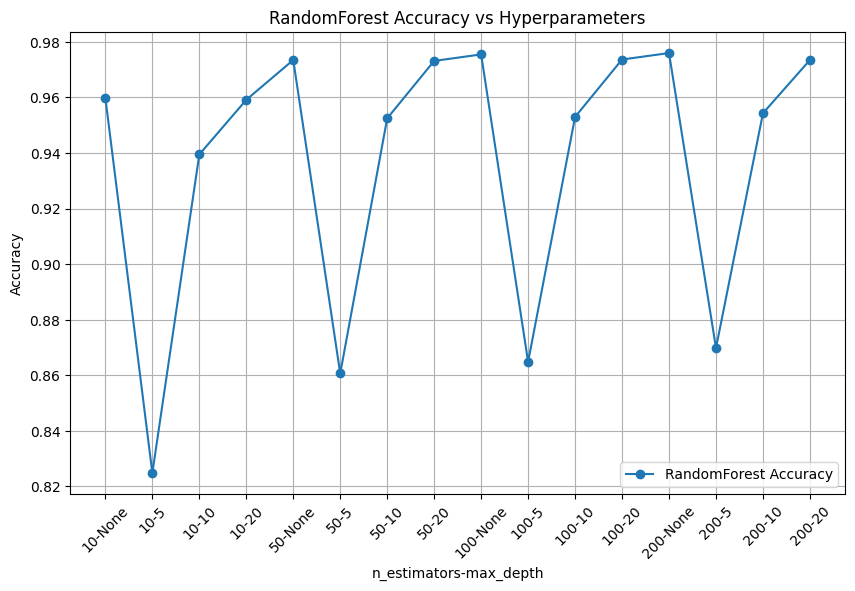

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# RandomForest 및 SVC 하이퍼파라미터 범위 설정
n_estimators_range = [10, 50, 100, 200]
max_depth_range = [None, 5, 10, 20]

# 데이터 정규화
def normalize_data(dataset):
    images, labels = zip(*dataset)
    return np.array(images) / 255.0, np.array(labels)

# 데이터셋 로드 및 정규화
X_train, y_train = normalize_data(train_data_augmented)
X_test, y_test = normalize_data(test_data)

# RandomForest 정확도 계산
print("RandomForest Hyperparameter Tuning:")
rf_results = {}
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
        y_pred_rf = rf_model.predict(X_test.reshape(X_test.shape[0], -1))
        accuracy = accuracy_score(y_test, y_pred_rf)
        rf_results[(n_estimators, max_depth)] = accuracy
        print(f"n_estimators={n_estimators}, max_depth={max_depth}, Accuracy={accuracy:.4f}")


# 그래프 시각화 - RandomForest
rf_x = list(rf_results.keys())
rf_y = list(rf_results.values())
plt.figure(figsize=(10, 6))
plt.plot(range(len(rf_y)), rf_y, marker='o', label='RandomForest Accuracy')
plt.xticks(ticks=range(len(rf_x)), labels=[f"{n}-{d}" for n, d in rf_x], rotation=45)
plt.xlabel('n_estimators-max_depth')
plt.ylabel('Accuracy')
plt.title('RandomForest Accuracy vs Hyperparameters')
plt.legend()
plt.grid()
plt.show()


#가장 높은 accuracy parameter : n_estimators=200, max_depth=None, Accuracy=0.9760


SVC Hyperparameter Tuning:
C=1, gamma=0.001, Accuracy=0.9517
C=1, gamma=0.01, Accuracy=0.9815
C=1, gamma=0.1, Accuracy=0.8173
C=1, gamma=1, Accuracy=0.1050
C=10, gamma=0.001, Accuracy=0.9672
C=10, gamma=0.01, Accuracy=0.9835
C=10, gamma=0.1, Accuracy=0.8302
C=10, gamma=1, Accuracy=0.1050
C=100, gamma=0.001, Accuracy=0.9730
C=100, gamma=0.01, Accuracy=0.9837
C=100, gamma=0.1, Accuracy=0.8302
C=100, gamma=1, Accuracy=0.1050


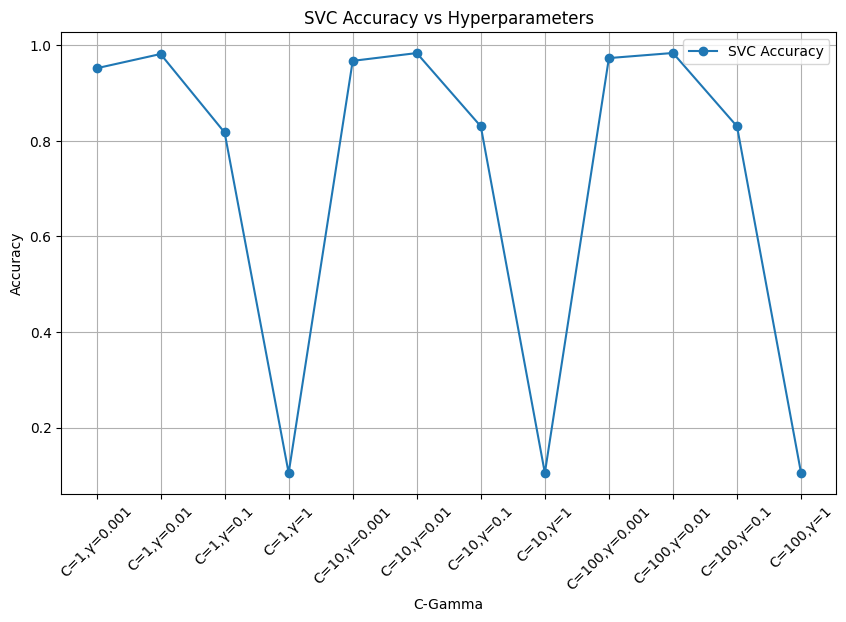

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVC 정확도 계산

C_range = [1, 10, 100]
gamma_range = [0.001, 0.01, 0.1, 1]
print("\nSVC Hyperparameter Tuning:")
svc_results = {}
for C in C_range:
    for gamma in gamma_range:
        svc_model = SVC(C=C, gamma=gamma)
        svc_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
        y_pred_svc = svc_model.predict(X_test.reshape(X_test.shape[0], -1))
        accuracy = accuracy_score(y_test, y_pred_svc)
        svc_results[(C, gamma)] = accuracy
        print(f"C={C}, gamma={gamma}, Accuracy={accuracy:.4f}")
# 그래프 시각화 - SVC
svc_x = list(svc_results.keys())
svc_y = list(svc_results.values())
plt.figure(figsize=(10, 6))
plt.plot(range(len(svc_y)), svc_y, marker='o', label='SVC Accuracy')
plt.xticks(ticks=range(len(svc_x)), labels=[f"C={C},γ={gamma}" for C, gamma in svc_x], rotation=45)
plt.xlabel('C-Gamma')
plt.ylabel('Accuracy')
plt.title('SVC Accuracy vs Hyperparameters')
plt.legend()
plt.grid()
plt.show()

#가장 높은 accuracy parameter: C=100, gamma=0.01, Accuracy=0.9837

# **따라서 가장 높은 accuracy는 98.37의 값을 구하였지만 svc의 경우 학습하는 시간이 약 4시간정도 걸리는 점을 고려했을때 정확도를 중요시하면 svc 시간을 중요시한다면 20~30분 정도 걸리는 97.6퍼센트의 정확도를 보이는 randomforest를 선택하는 편이 좋다고 생각했습니다.**

#위 코드를 실행하여 나온값을 바탕으로 subplot으로 나타내면 아래와 같은 이미지가 나옵니다. 이미지 파일을 넣은 이유는 위의 코드가 오랜 시간(대략 12시간정도)이 소요되고 혹시 run버튼을 누를 경우의 불상사를 고려했기 때문입니다.

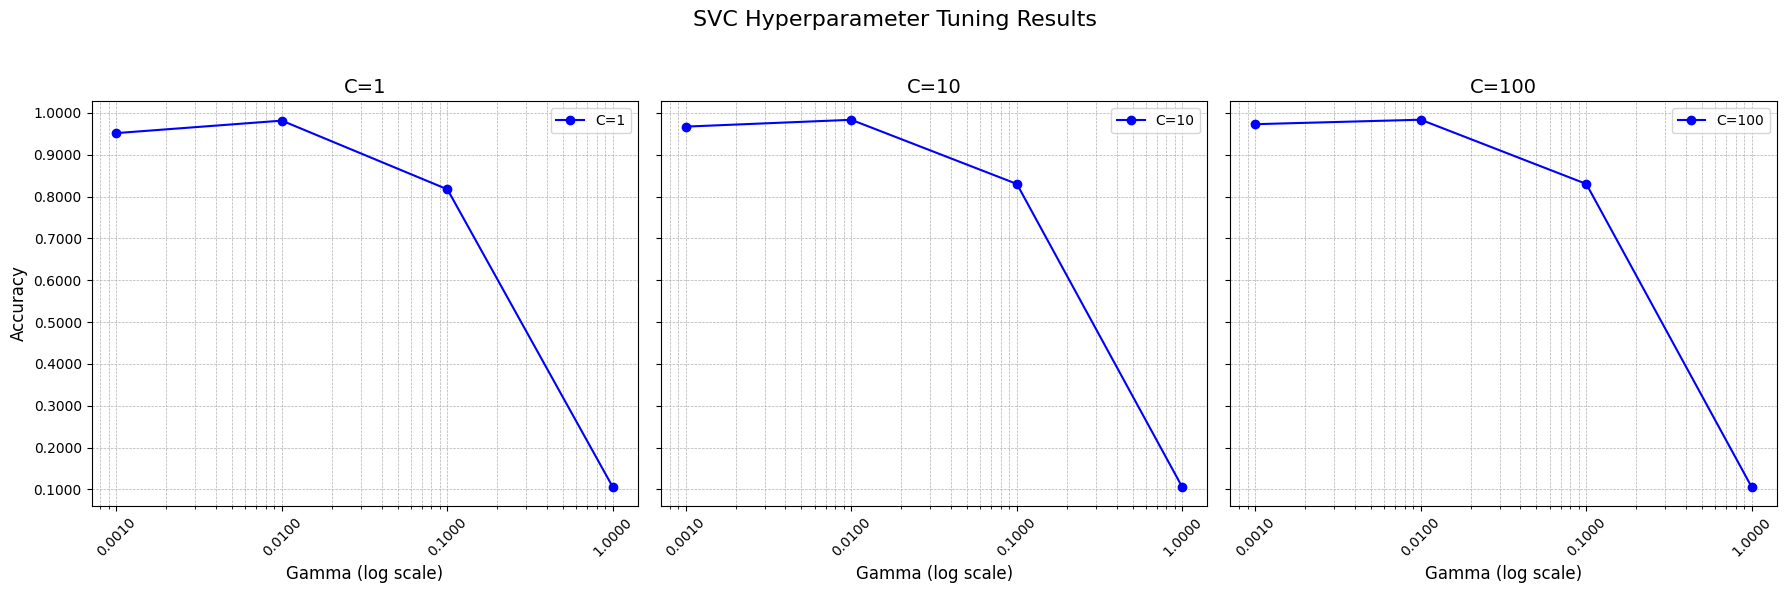

#전경색 후경색 구분 classifier만들기

데이터를 출력하여 무슨 데이터인지 확인

In [ ]:
output_images[0]

(<PIL.Image.Image image mode=RGB size=28x28>, 5, 'VIOLET', 'GREEN')

In [ ]:
from PIL import Image
import numpy as np
numb = 1
for i in range(numb):

  # output_images에 있는 첫 번째 이미지 가져오기
  image, label, fg_label, bg_label = output_images[41699]

  # 이미지를 numpy 배열로 변환
  pixel_data = np.array(image)

  # 채널별 RGB 값 추출
  r_channel = pixel_data[:, :, 0]  # Red 채널
  g_channel = pixel_data[:, :, 1]  # Green 채널
  b_channel = pixel_data[:, :, 2]  # Blue 채널

  # 채널별로 28x28 크기의 이미지 출력
  print(output_images[41699])
  print("Red Channel (28x28):")
  print(r_channel)

  print("\nGreen Channel (28x28):")
  print(g_channel)

  print("\nBlue Channel (28x28):")
  print(b_channel)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

(<PIL.Image.Image image mode=RGB size=28x28 at 0x7E2F0EA07760>, 8, 'GREEN', 'VIOLET')
Red Channel (28x28):
[[148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148]
 [148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148]
 [148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148]
 [148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148]
 [148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 148]
 [148 148 148 148 148 148 148 148 148 148 148 148 148 148 148 146 124  74  48   9   0  41 119 148 148 148 148 148]
 [148 148 148 148 148 148 148 148 148 148 148 148 148 145 122  43   4  30  58  58  58  26  38 148 148 148 148 148]
 [148 148 148 148 148 148 148 148 148 148 148 148 143  64   0   6 106 148 148 148 145  2

#이 데이터에서 후경과 전경을 구분하기 위해 가장 많이 분포하고 있는 픽셀에 대해 배경으로 나머지를 전경으로 판단하여 한픽셀을 샘플링하도록 진행
#전경부분도 후경을 제외한 부분에서 최빈값을 구하도록 하는 방식을 사용

In [ ]:
from PIL import Image
import numpy as np
from collections import Counter

# 각 채널에서 후경 채널의 가장 많이 분포된 값을 추출 (후경은 bg_label로 추정)
def get_background_values(channel):
    # 2D 배열을 1D 배열로 변환
    channel_flat = channel.flatten()

    # 각 값의 빈도 계산
    counter = Counter(channel_flat)

    # 가장 빈도가 높은 값 추출
    most_common_value, _ = counter.most_common(1)[0]
    return most_common_value

def get_foreground_values(channel, most_common_bg_value):
    # 2D 배열을 1D 배열로 변환
    channel_flat = channel.flatten()

    # 모든 값이 동일한지 확인
    if np.all(channel_flat == channel_flat[0]):
        return channel_flat[0]  # 모든 값이 같으면 그 값을 반환

    # 숫자 부분(전경 부분)의 인덱스를 필터링
    fg_indices = np.where(channel_flat != most_common_bg_value)[0]  # 후경 값이 아닌 부분의 인덱스

    # 해당 인덱스의 값을 추출
    fg_values = channel_flat[fg_indices]

    # 전경 값들 중 가장 빈도가 높은 값 계산
    if len(fg_values) > 0:
        counter = Counter(fg_values)
        most_common_fg_value, _ = counter.most_common(1)[0]  # 가장 빈도가 높은 값
    else:
        most_common_fg_value = None  # 전경 값이 없는 경우 None 반환

    return most_common_fg_value

# 전체 output_images 데이터셋에 대해 처리
def process_output_images(output_images):
    color_output_images = []  # 결과를 저장할 리스트
    #인덱스 추가
    i = 0
    for image_data in output_images:
        image, label, fg_label, bg_label = image_data

        # 이미지를 numpy 배열로 변환
        pixel_data = np.array(image)

        # 채널별 RGB 값 추출
        r_channel = pixel_data[:, :, 0]  # Red 채널
        g_channel = pixel_data[:, :, 1]  # Green 채널
        b_channel = pixel_data[:, :, 2]  # Blue 채널

        # 후경 값 구하기
        r_bg_values = get_background_values(r_channel)
        g_bg_values = get_background_values(g_channel)
        b_bg_values = get_background_values(b_channel)

        bg_data = (r_bg_values, g_bg_values, b_bg_values)

        # 전경 값 구하기
        r_fg_values = get_foreground_values(r_channel, r_bg_values)
        g_fg_values = get_foreground_values(g_channel, g_bg_values)
        b_fg_values = get_foreground_values(b_channel, b_bg_values)

        fg_data = (r_fg_values, g_fg_values, b_fg_values)

        # 최종 데이터 저장
        color_output_images.append(( fg_data,bg_data, fg_label, bg_label,i))
        i = i + 1
    return color_output_images

# 예제: 60000개의 output_images 데이터 처리
processed_data = process_output_images(output_images)

# 결과 확인
print(f"처리된 데이터 개수: {len(processed_data)}")
print(f"첫 번째 데이터: {processed_data[0]}")
print(f"두 번째 데이터: {processed_data[1]}")
print(f"세 번째 데이터: {processed_data[2]}")
print(f"네 번째 데이터: {processed_data[3]}")

처리된 데이터 개수: 60000
첫 번째 데이터: ((146, 2, 209), (0, 255, 0), 'VIOLET', 'GREEN', 0)
두 번째 데이터: ((1, 0, 254), (148, 0, 211), 'BLUE', 'VIOLET', 1)
세 번째 데이터: ((254, 254, 1), (0, 0, 255), 'YELLOW', 'BLUE', 2)
네 번째 데이터: ((2, 0, 254), (148, 0, 211), 'BLUE', 'VIOLET', 3)


#추후의 오분류 데이터 분석을 하기 위해 데이터의 마지막 부분에 i 즉 인덱스 값을 임의로 넣음으로써 나중에 오분류된 데이터를 시각화하여 분석하고자 함

#전경 샘플링 none값을 반환할 수도 있기 때문에 아래 식을 통해 검사

In [ ]:
import numpy as np

# NaN 또는 None이 포함된 항목을 출력
def check_nan_or_none_in_processed_data(processed_data):
    print("NaN 또는 None이 포함된 항목:")
    for idx, (fg_data, bg_data, fg_label, bg_label, i) in enumerate(processed_data):
        # 전경 데이터(fg_data)와 후경 데이터(bg_data)에 대해 None 또는 NaN 확인
        def has_nan_or_none(data):
            for value in data:
                if value is None:  # None 체크
                    return True
                try:
                    if np.isnan(float(value)):  # NaN 체크
                        return True
                except (ValueError, TypeError):
                    pass
            return False

        fg_has_nan_or_none = has_nan_or_none(fg_data)
        bg_has_nan_or_none = has_nan_or_none(bg_data)

        if fg_has_nan_or_none or bg_has_nan_or_none:
            print(f"인덱스 {i}에서 NaN 또는 None이 포함되어 있습니다.")
            print(f"  fg_data: {fg_data}")
            print(f"  bg_data: {bg_data}")
            print(f"  fg_label: {fg_label}, bg_label: {bg_label}")

# 처리된 데이터에서 NaN 또는 None이 있는지 확인
check_nan_or_none_in_processed_data(processed_data)


NaN 또는 None이 포함된 항목:


In [ ]:
# fg_data 종류 개수 출력
def print_fg_data_count(processed_data):
    # 모든 fg_data 값을 수집
    fg_data_values = [data[0] for data in processed_data]

    # 고유 값 추출
    unique_fg_values = set(fg_data_values)

    # 고유 값 개수 출력
    print("Number of unique fg_data values:", len(unique_fg_values))

# fg_data 종류 개수 출력
print_fg_data_count(processed_data)


Number of unique fg_data values: 888


# 위 코드에 따라 생성되는 샘플링 데이터의 종류를 조사하여 데이터 편향으로 인한 오버피팅 조사 - 888개의 데이터 종류

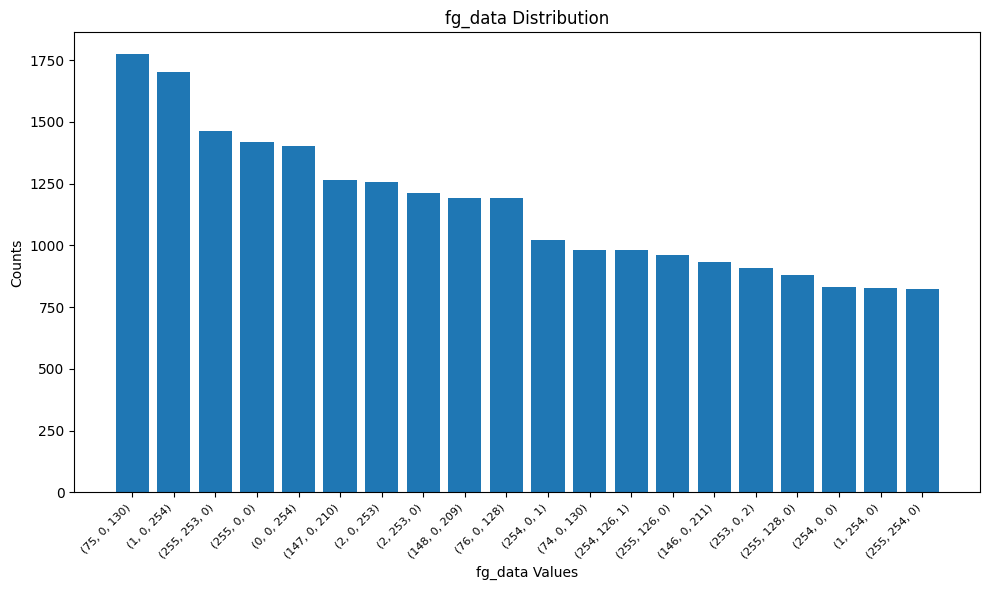

In [ ]:
import matplotlib.pyplot as plt

def plot_fg_data_distribution(processed_data, top_n=None):
    # 모든 fg_data 값을 수집
    fg_data_values = [data[0] for data in processed_data]

    # 값별 빈도 계산
    fg_data_counter = Counter(fg_data_values)

    # 빈도수가 높은 순서로 정렬
    sorted_fg_data = fg_data_counter.most_common()

    # 상위 n개만 표시 (선택적으로)
    if top_n:
        sorted_fg_data = sorted_fg_data[:top_n]

    # 값과 빈도를 분리
    labels, counts = zip(*sorted_fg_data)

    # 그래프 생성
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(labels)), counts, tick_label=[str(label) for label in labels])

    # x축 레이블 회전
    plt.xticks(rotation=45, ha='right', fontsize=8)  # x축 레이블 회전 및 크기 조정

    # 그래프 제목 및 축 라벨
    plt.title("fg_data Distribution")
    plt.xlabel("fg_data Values")
    plt.ylabel("Counts")

    # 그래프 표시
    plt.tight_layout()
    plt.show()

# 실행 (상위 20개의 데이터만 표시)
plot_fg_data_distribution(processed_data, top_n=20)


#상위 20개의 데이터를 그래프화하여 나타내명 위와 같다.

NaN과 None이 출력되지 않으면 데이터가 잘 만들어졌음을 의미합니다.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# 전경 데이터를 추출
foreground_data = list(zip(
    [item[0] for item in processed_data],  # 전경 픽셀 데이터 (R, G, B)
    [item[2] for item in processed_data],  # 전경 레이블
    [item[4] for item in processed_data]   # 전경 인덱스
))

# 후경 데이터를 추출
background_data = list(zip(
    [item[1] for item in processed_data],  # 후경 픽셀 데이터 (R, G, B)
    [item[3] for item in processed_data],  # 후경 레이블
    [item[4] for item in processed_data]   # 후경 인덱스
))






# 8:1:1로 데이터 분할 - 전경
foreground_train, foreground_temp = train_test_split(foreground_data, test_size=0.2, random_state=42)
foreground_valid, foreground_test = train_test_split(foreground_temp, test_size=0.5, random_state=42)

# 8:1:1로 데이터 분할 - 후경
background_train, background_temp = train_test_split(background_data, test_size=0.2, random_state=42)
background_valid, background_test = train_test_split(background_temp, test_size=0.5, random_state=42)



# 데이터를 각각 분리
def split_data(data):
    features, labels, indices = zip(*data)
    return np.array(features), np.array(labels), np.array(indices)

# 전경 데이터 분리
X_foreground_train, y_foreground_train, idx_foreground_train = split_data(foreground_train)
X_foreground_valid, y_foreground_valid, idx_foreground_valid = split_data(foreground_valid)
X_foreground_test, y_foreground_test, idx_foreground_test = split_data(foreground_test)

# 후경 데이터 분리
X_background_train, y_background_train, idx_background_train = split_data(background_train)
X_background_valid, y_background_valid, idx_background_valid = split_data(background_valid)
X_background_test, y_background_test, idx_background_test = split_data(background_test)

# 전경 분류기 학습
foreground_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
foreground_clf.fit(X_foreground_train, y_foreground_train)

# 후경 분류기 학습
background_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
background_clf.fit(X_background_train, y_background_train)

# 전경 검증 데이터 평가
y_foreground_valid_pred = foreground_clf.predict(X_foreground_valid)
print("Foreground Validation Accuracy:", accuracy_score(y_foreground_valid, y_foreground_valid_pred))

# 후경 검증 데이터 평가
y_background_valid_pred = background_clf.predict(X_background_valid)
print("Background Validation Accuracy:", accuracy_score(y_background_valid, y_background_valid_pred))

# 전경 테스트 데이터 평가
y_foreground_test_pred = foreground_clf.predict(X_foreground_test)
print("Foreground Test Accuracy:", accuracy_score(y_foreground_test, y_foreground_test_pred))
print("Foreground Classification Report:\n", classification_report(y_foreground_test, y_foreground_test_pred))

# 후경 테스트 데이터 평가
y_background_test_pred = background_clf.predict(X_background_test)
print("Background Test Accuracy:", accuracy_score(y_background_test, y_background_test_pred))
print("Background Classification Report:\n", classification_report(y_background_test, y_background_test_pred))


Foreground Validation Accuracy: 0.9915
Background Validation Accuracy: 1.0
Foreground Test Accuracy: 0.9936666666666667
Foreground Classification Report:
               precision    recall  f1-score   support

        BLUE       0.99      0.99      0.99       871
       GREEN       0.99      1.00      0.99       827
      INDIGO       1.00      0.99      0.99       851
      ORANGE       1.00      0.99      0.99       828
         RED       0.99      1.00      0.99       881
      VIOLET       1.00      0.99      1.00       862
      YELLOW       0.99      0.99      0.99       880

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

Background Test Accuracy: 1.0
Background Classification Report:
               precision    recall  f1-score   support

        BLUE       1.00      1.00      1.00       822
       GREEN       1.00      1.00      1.00       874
      INDIGO       1

#위 코드를 보면 최빈값을 샘플링하였기 때문에 후경값은 1의 accuracy값을 가지는걸 확인할 수 있습니다. 하지만 전경부분에서 약 99퍼센트의 accuracy값을 가지는데 이 부분에 있어서 저희 조는 궁금증을 가졌습니다. 더 높은 정확도를 가질 수 있다고 생각이 들어서 오류에 대해 분석하고자 했습니다.

In [ ]:
# 전경 및 후경 오분류된 인덱스를 저장할 리스트
mismatched_foreground_indices = []
mismatched_background_indices = []
fore_num = 0
# 전경 테스트 데이터 중 한 샘플 선택
for i in range(len(X_foreground_test)):
    original_index_foreground = idx_foreground_test[i]  # 분할 전 원래 인덱스
    selected_foreground_sample = X_foreground_test[i].reshape(1, -1)  # 2D 형태로 변경
    selected_foreground_label = y_foreground_test[i]  # 실제 레이블

    # 예측 수행
    predicted_foreground_label = foreground_clf.predict(selected_foreground_sample)[0]
    if selected_foreground_label != predicted_foreground_label:
        fore_num +=1
        # 결과 출력
        print(f"Foreground Test Sample at original index {original_index_foreground}: {selected_foreground_sample}")
        print(f"Actual Foreground Label: {selected_foreground_label}")
        print(f"Predicted Foreground Label: {predicted_foreground_label}")
        print("Match:", selected_foreground_label == predicted_foreground_label)

        # 오분류된 인덱스 추가
        mismatched_foreground_indices.append(original_index_foreground)

    # 후경 테스트 데이터 중 한 샘플 선택
    original_index_background = idx_background_test[i]  # 분할 전 원래 인덱스
    selected_background_sample = X_background_test[i].reshape(1, -1)  # 2D 형태로 변경
    selected_background_label = y_background_test[i]  # 실제 레이블

    # 예측 수행
    predicted_background_label = background_clf.predict(selected_background_sample)[0]
    if selected_background_label != predicted_background_label:
        # 결과 출력
        print(f"\nBackground Test Sample at original index {original_index_background}: {selected_background_sample}")
        print(f"Actual Background Label: {selected_background_label}")
        print(f"Predicted Background Label: {predicted_background_label}")
        print("Match:", selected_background_label == predicted_background_label)

        # 오분류된 인덱스 추가
        mismatched_background_indices.append(original_index_background)

# 오분류된 인덱스 출력
print("\nMismatched Foreground Indices (original):", mismatched_foreground_indices, "number of foreground=",fore_num)
print("Mismatched Background Indices (original):", mismatched_background_indices)


Foreground Test Sample at original index 41699: [[  0 254 206]]
Actual Foreground Label: GREEN
Predicted Foreground Label: YELLOW
Match: False
Foreground Test Sample at original index 1165: [[254   0   1]]
Actual Foreground Label: BLUE
Predicted Foreground Label: RED
Match: False
Foreground Test Sample at original index 4064: [[ 12  12 243]]
Actual Foreground Label: YELLOW
Predicted Foreground Label: BLUE
Match: False
Foreground Test Sample at original index 23240: [[255 117   0]]
Actual Foreground Label: RED
Predicted Foreground Label: ORANGE
Match: False
Foreground Test Sample at original index 24922: [[ 43   0 181]]
Actual Foreground Label: INDIGO
Predicted Foreground Label: BLUE
Match: False
Foreground Test Sample at original index 30765: [[ 11  11 244]]
Actual Foreground Label: YELLOW
Predicted Foreground Label: BLUE
Match: False
Foreground Test Sample at original index 29082: [[ 66  29 115]]
Actual Foreground Label: GREEN
Predicted Foreground Label: INDIGO
Match: False
Foreground

#위의 코드는 오분류된 데이터에 대해 인덱스값 즉 i값을 출력하도록 만든 코드입니다. 6000개의 데이터중 38개의 데이터가 오분류되는걸 확인할 수 있습니다.


Mismatched Foreground Predictions:
Index: 41699, NUM: 8, FORE: GREEN, BACK: VIOLET


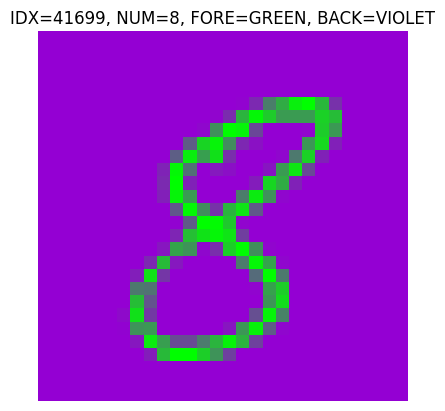

Index: 1165, NUM: 2, FORE: BLUE, BACK: RED


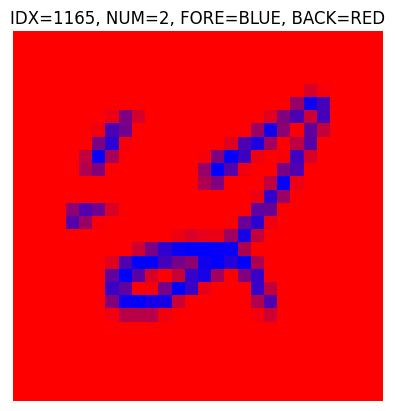

Index: 4064, NUM: 1, FORE: YELLOW, BACK: BLUE


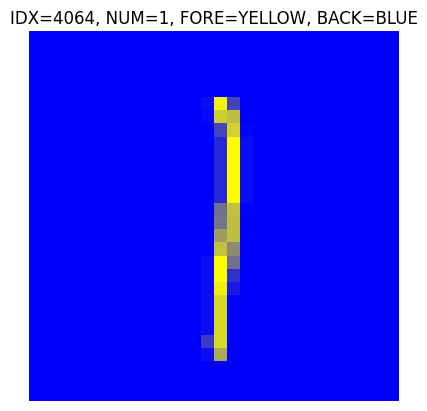

Index: 23240, NUM: 1, FORE: RED, BACK: YELLOW


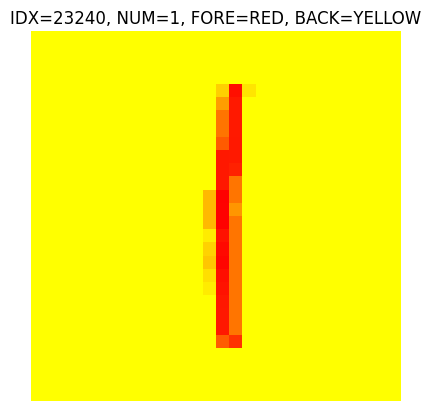

Index: 24922, NUM: 4, FORE: INDIGO, BACK: BLUE


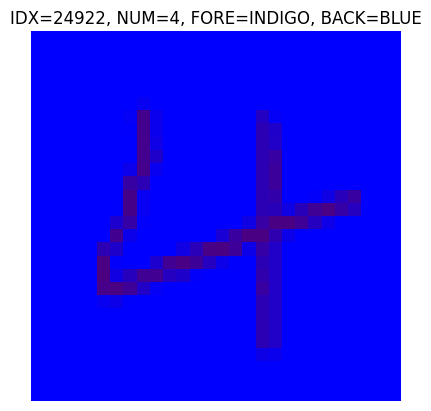

Index: 30765, NUM: 4, FORE: YELLOW, BACK: BLUE


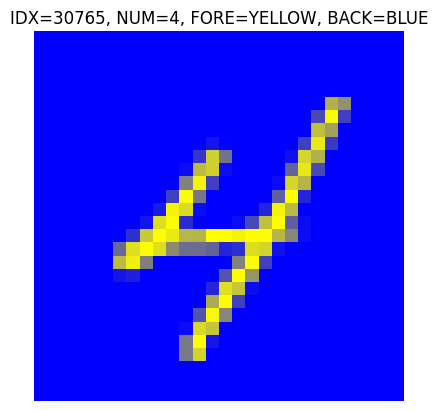

Index: 29082, NUM: 8, FORE: GREEN, BACK: INDIGO


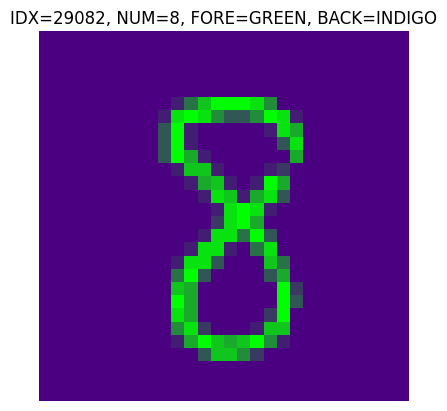

Index: 36264, NUM: 1, FORE: BLUE, BACK: YELLOW


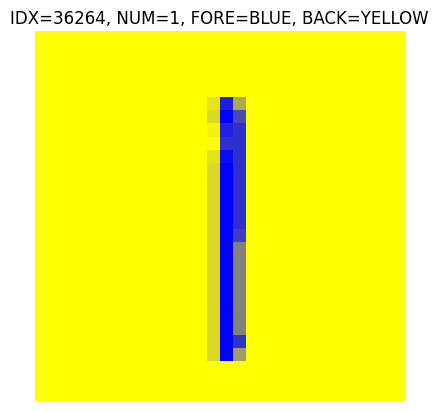

Index: 34410, NUM: 7, FORE: INDIGO, BACK: YELLOW


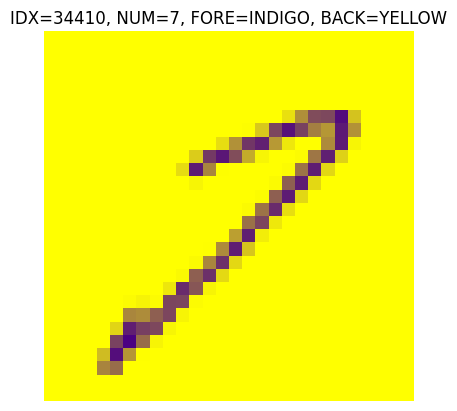

Index: 5966, NUM: 1, FORE: GREEN, BACK: INDIGO


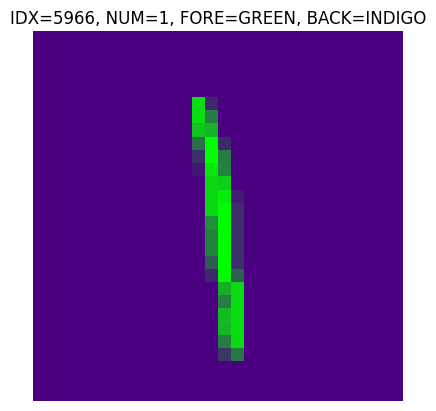

Index: 13912, NUM: 6, FORE: INDIGO, BACK: ORANGE


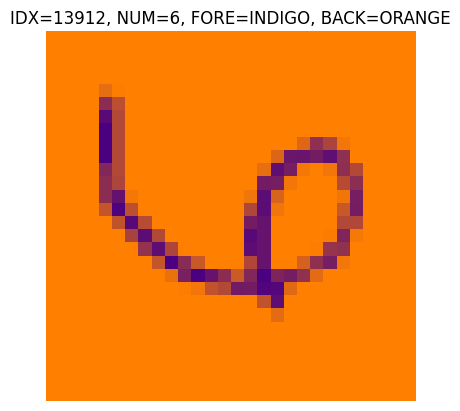

Index: 6748, NUM: 1, FORE: ORANGE, BACK: BLUE


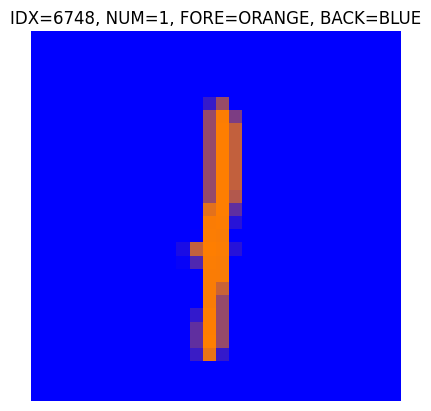

Index: 16264, NUM: 7, FORE: RED, BACK: INDIGO


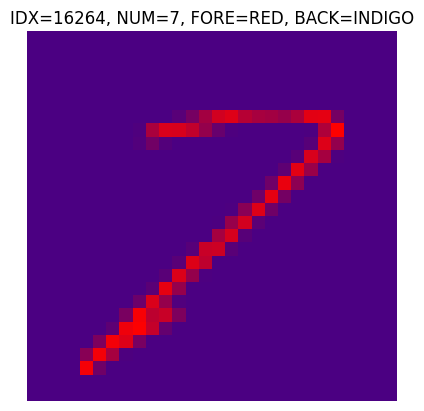

Index: 12136, NUM: 1, FORE: VIOLET, BACK: ORANGE


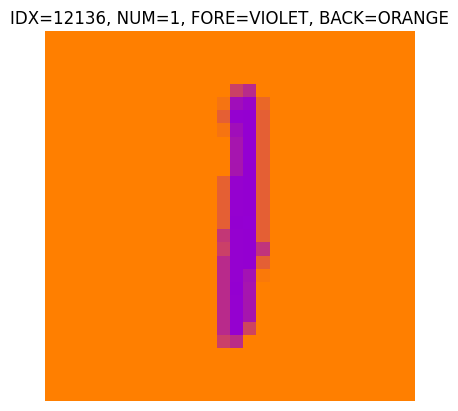

Index: 18842, NUM: 9, FORE: ORANGE, BACK: BLUE


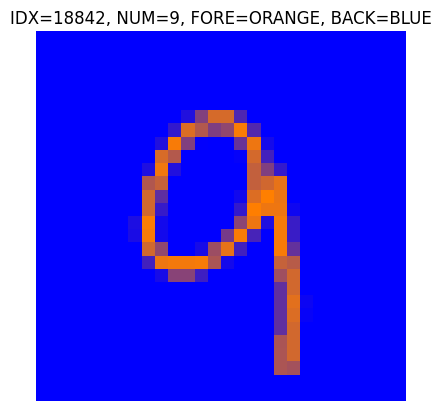

Index: 9258, NUM: 2, FORE: VIOLET, BACK: RED


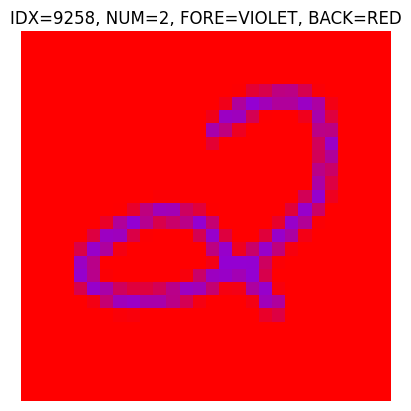

Index: 1288, NUM: 5, FORE: ORANGE, BACK: INDIGO


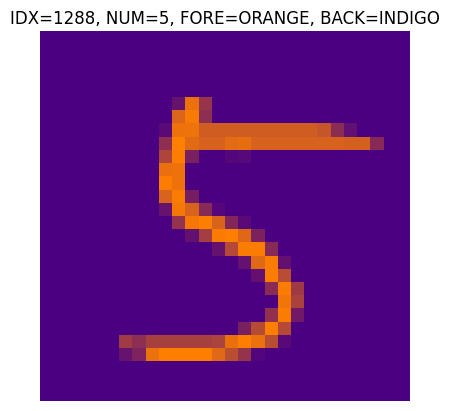

Index: 19620, NUM: 3, FORE: BLUE, BACK: INDIGO


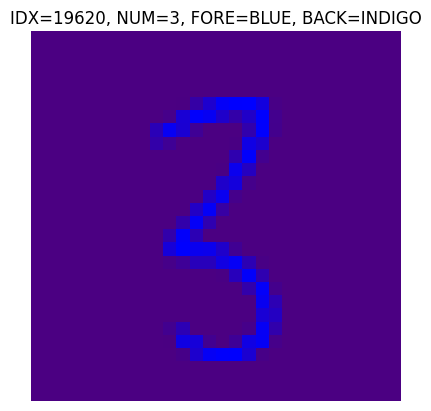

Index: 11912, NUM: 9, FORE: GREEN, BACK: YELLOW


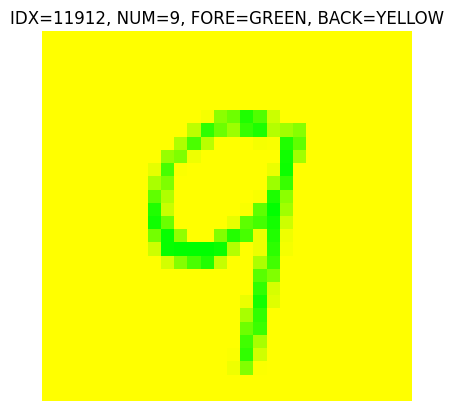

Index: 2564, NUM: 3, FORE: INDIGO, BACK: YELLOW


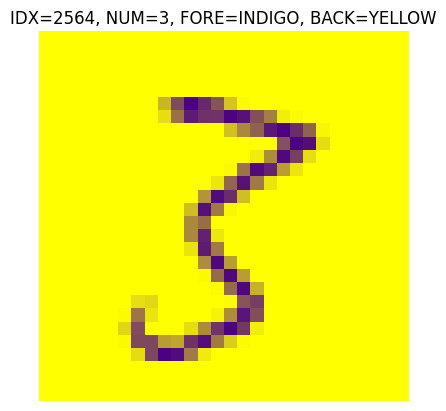

Index: 51964, NUM: 8, FORE: YELLOW, BACK: BLUE


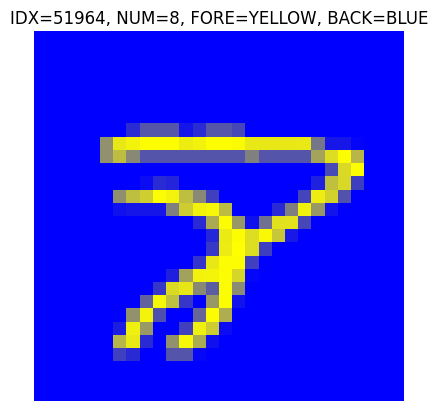

Index: 33702, NUM: 4, FORE: ORANGE, BACK: VIOLET


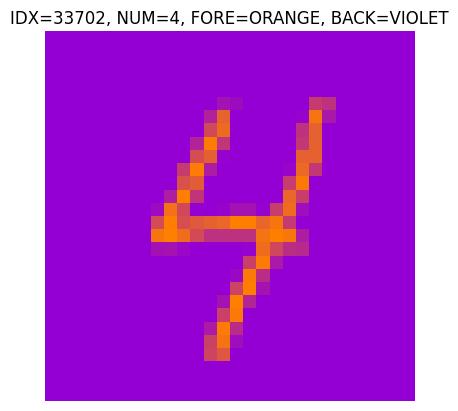

Index: 13856, NUM: 4, FORE: YELLOW, BACK: BLUE


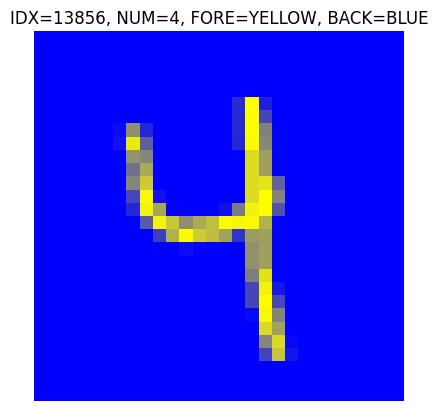

Index: 35734, NUM: 6, FORE: INDIGO, BACK: ORANGE


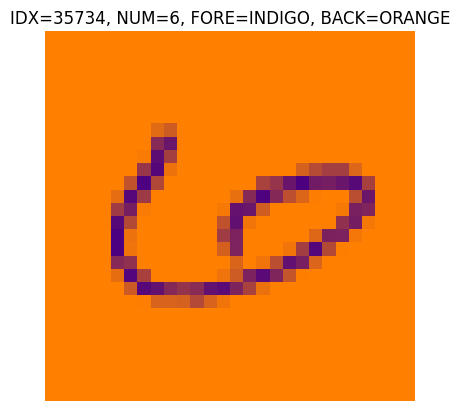

Index: 5582, NUM: 1, FORE: VIOLET, BACK: BLUE


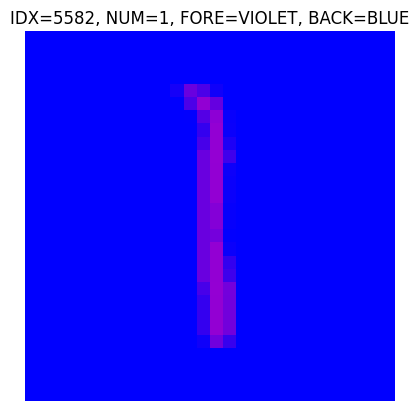

Index: 10646, NUM: 9, FORE: INDIGO, BACK: GREEN


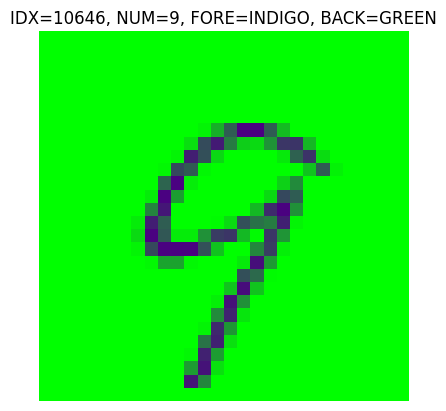

Index: 2902, NUM: 4, FORE: VIOLET, BACK: GREEN


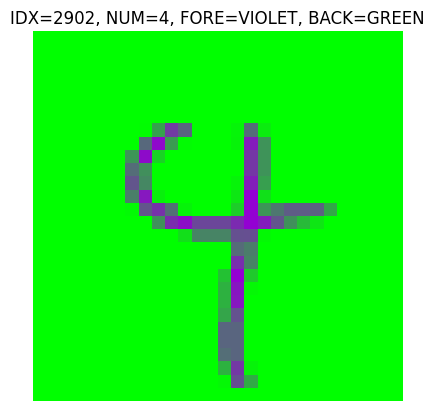

Index: 18762, NUM: 8, FORE: YELLOW, BACK: VIOLET


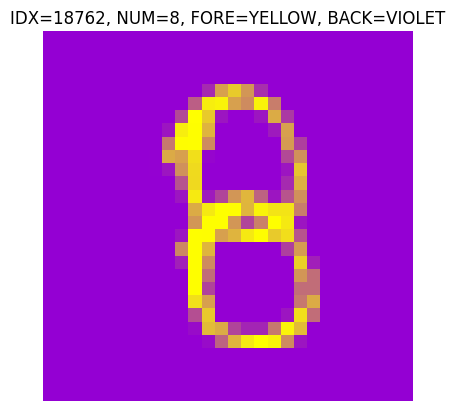

Index: 50480, NUM: 0, FORE: RED, BACK: GREEN


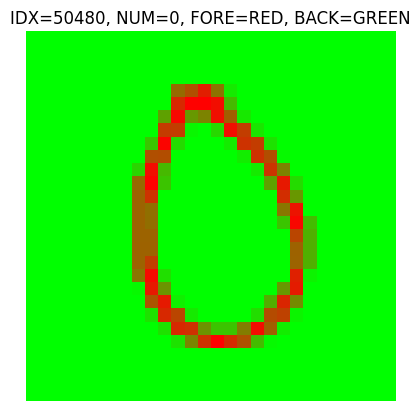

Index: 46444, NUM: 9, FORE: INDIGO, BACK: YELLOW


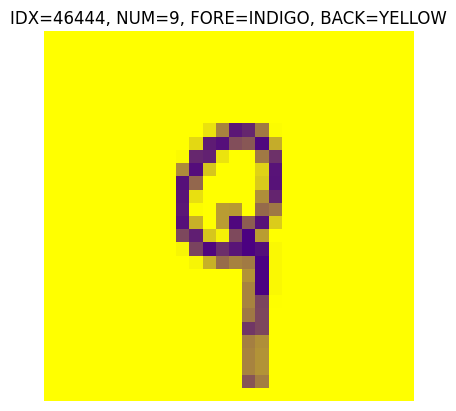

Index: 33558, NUM: 1, FORE: YELLOW, BACK: RED


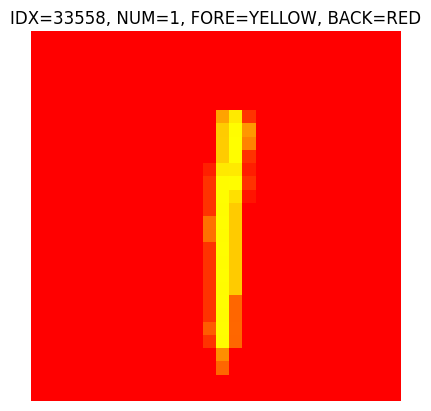

Index: 55222, NUM: 1, FORE: YELLOW, BACK: ORANGE


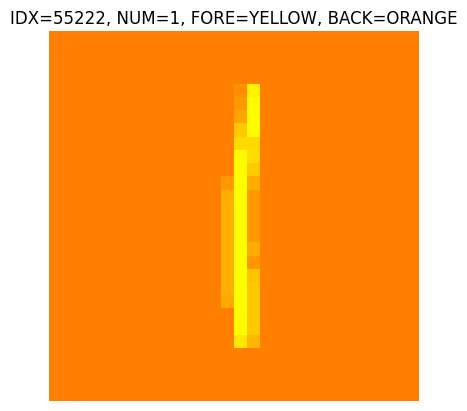

Index: 7208, NUM: 9, FORE: VIOLET, BACK: GREEN


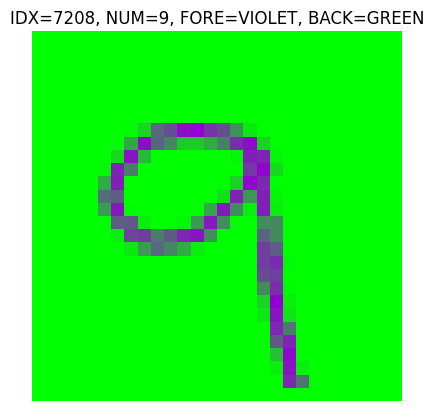

Index: 58056, NUM: 1, FORE: BLUE, BACK: VIOLET


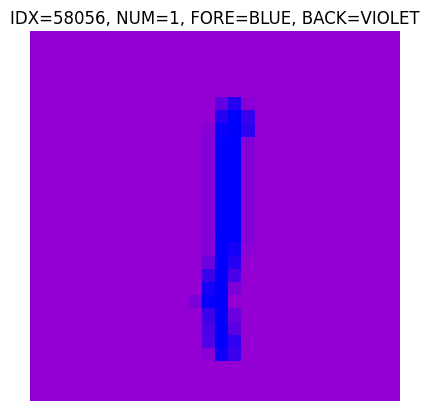

Index: 34486, NUM: 0, FORE: INDIGO, BACK: YELLOW


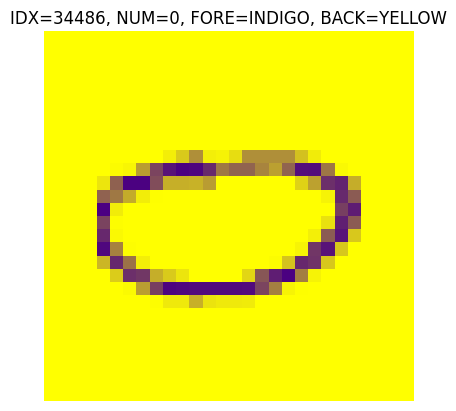

Index: 16100, NUM: 7, FORE: ORANGE, BACK: YELLOW


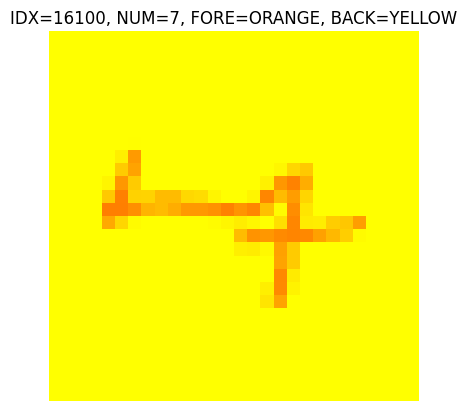

Index: 22312, NUM: 9, FORE: BLUE, BACK: VIOLET


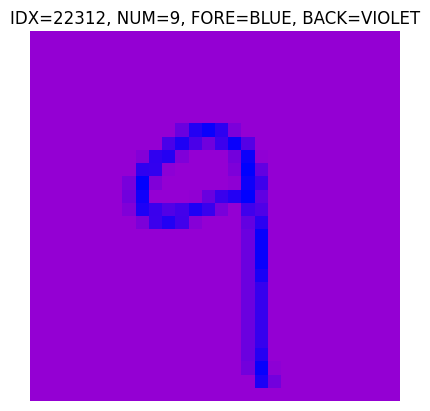

Index: 18372, NUM: 1, FORE: BLUE, BACK: RED


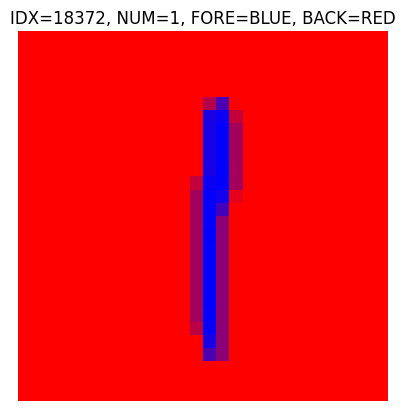


Mismatched Background Predictions:


In [ ]:
import matplotlib.pyplot as plt

# 오분류된 이미지 출력 함수
def display_mismatched_images(indices, output_images, data_type="Foreground"):
    """
    오분류된 이미지를 출력합니다.

    Parameters:
        indices (list): 오분류된 데이터의 인덱스 리스트
        output_images (list): 처리된 이미지와 관련 정보를 담고 있는 리스트
        data_type (str): 데이터 타입 (Foreground / Background)
    """
    print(f"\nMismatched {data_type} Predictions:")

    for i, index in enumerate(indices):
        # 오분류된 이미지 정보 가져오기
        final_image, label, fg_label, bg_label = output_images[index]

        # 인덱스, 레이블 및 색상 정보 출력
        print(f"Index: {index}, NUM: {label}, FORE: {fg_label}, BACK: {bg_label}")

        # 이미지 출력
        plt.figure()
        plt.imshow(final_image)
        plt.axis('off')
        plt.title(f"IDX={index}, NUM={label}, FORE={fg_label}, BACK={bg_label}")
        plt.show()

# 예제: 오분류된 인덱스를 기반으로 이미지를 출력
display_mismatched_images(mismatched_foreground_indices, output_images, data_type="Foreground")
display_mismatched_images(mismatched_background_indices, output_images, data_type="Background")


#오분류된 데이터 38개의 값을 이미지화 해본 결과 상당히 얇은 글씨로 쓰여져 있는걸 볼 수 있었습니다. 실질적인 전경 픽셀보다 그라데이션 즉 노이즈 부분이 많아 잘못된 부분이 샘플링 되는것이 문제라고 생각했습니다.

#**이 부분을 통해 앞서 구해놓았던 숫자 분류기에서 흑백 데이터를 구성하는데 있어서 모자이크를 어떻게 다룰지 자주 의논했습니다. 모자이크 부분을 아예 제거하자는 의견도 있었지만 위의 결과를 보고 앞서 구해놓은 숫자 분류기에서 모자이크를 숫자로 판단하고 같은 수로 통일 시키지 않았더라면 숫자 픽셀이 깨질 수도 있겠다고 생각하여 앞의 숫자 흑백 전처리를 하고자 한 근거가 되었습니다.**

#저희 머러탕은 여러 방안을 생각했습니다.

#첫번째, RAINBOW_COLORS를 기반으로 가장 가까운 픽셀의 경우 해당 픽셀에 대해 RAINBOW_COLORS내부의 값으로 치환하여 샘플링하도록하는방안 - 이 경우 유클리드 거리계산 법으로 사용하여 코드를 만들어 보았으나 overfitting의 위험을 무시할 수 없었습니다.

In [ ]:
from PIL import Image
import numpy as np
from collections import Counter

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

# 유클리드 거리 계산 함수
def euclidean_distance(color1, color2):
    return np.sqrt(sum((c1 - c2) ** 2 for c1, c2 in zip(color1, color2)))

# 전경 값과 가장 가까운 무지개 색상 반환 함수
def get_closest_rainbow_color(fg_color):
    if fg_color is None:
        return None

    distances = [euclidean_distance(fg_color, rainbow_color) for rainbow_color in RAINBOW_COLORS]
    closest_color = RAINBOW_COLORS[np.argmin(distances)]
    return closest_color

# 각 채널에서 후경 채널의 가장 많이 분포된 값을 추출 (후경은 bg_label로 추정)
def get_background_values(channel):
    # 2D 배열을 1D 배열로 변환
    channel_flat = channel.flatten()

    # 각 값의 빈도 계산
    counter = Counter(channel_flat)

    # 가장 빈도가 높은 값 추출
    most_common_value, _ = counter.most_common(1)[0]
    return most_common_value

# 전경 값 추출 함수 (유지)
def get_foreground_values(channel, most_common_bg_value):
    # 2D 배열을 1D 배열로 변환
    channel_flat = channel.flatten()

    # 모든 값이 동일한지 확인
    if np.all(channel_flat == channel_flat[0]):
        return channel_flat[0]  # 모든 값이 같으면 그 값을 반환

    # 숫자 부분(전경 부분)의 인덱스를 필터링
    fg_indices = np.where(channel_flat != most_common_bg_value)[0]  # 후경 값이 아닌 부분의 인덱스

    # 해당 인덱스의 값을 추출
    fg_values = channel_flat[fg_indices]

    # 전경 값들 중 가장 빈도가 높은 값 계산
    if len(fg_values) > 0:
        counter = Counter(fg_values)
        most_common_fg_value, _ = counter.most_common(1)[0]  # 가장 빈도가 높은 값
    else:
        most_common_fg_value = None  # 전경 값이 없는 경우 None 반환

    return most_common_fg_value

# 전체 output_images 데이터셋에 대해 처리
def process_output_images(output_images):
    color_output_images = []  # 결과를 저장할 리스트
    # 인덱스 추가
    i = 0
    for image_data in output_images:
        image, label, fg_label, bg_label = image_data

        # 이미지를 numpy 배열로 변환
        pixel_data = np.array(image)

        # 채널별 RGB 값 추출
        r_channel = pixel_data[:, :, 0]  # Red 채널
        g_channel = pixel_data[:, :, 1]  # Green 채널
        b_channel = pixel_data[:, :, 2]  # Blue 채널

        # 후경 값 구하기
        r_bg_values = get_background_values(r_channel)
        g_bg_values = get_background_values(g_channel)
        b_bg_values = get_background_values(b_channel)

        bg_data = (r_bg_values, g_bg_values, b_bg_values)

        # 전경 값 구하기
        r_fg_values = get_foreground_values(r_channel, r_bg_values)
        g_fg_values = get_foreground_values(g_channel, g_bg_values)
        b_fg_values = get_foreground_values(b_channel, b_bg_values)

        fg_data = (r_fg_values, g_fg_values, b_fg_values)

        # 전경 색상을 무지개 색상 팔레트 중 가장 가까운 색상으로 변환
        closest_fg_color = get_closest_rainbow_color(fg_data)

        # 최종 데이터 저장
        color_output_images.append((closest_fg_color, bg_data, fg_label, bg_label, i))
        i = i + 1
    return color_output_images

# 예제: 60000개의 output_images 데이터 처리
processed_euclidean_data = process_output_images(output_images)

# 결과 확인
print(f"처리된 데이터 개수: {len(processed_euclidean_data)}")
print(f"첫 번째 데이터: {processed_euclidean_data[0]}")
print(f"두 번째 데이터: {processed_euclidean_data[1]}")
print(f"세 번째 데이터: {processed_euclidean_data[2]}")
print(f"네 번째 데이터: {processed_euclidean_data[3]}")


처리된 데이터 개수: 60000
첫 번째 데이터: ((148, 0, 211), (0, 255, 0), 'VIOLET', 'GREEN', 0)
두 번째 데이터: ((0, 0, 255), (148, 0, 211), 'BLUE', 'VIOLET', 1)
세 번째 데이터: ((255, 255, 0), (0, 0, 255), 'YELLOW', 'BLUE', 2)
네 번째 데이터: ((0, 0, 255), (148, 0, 211), 'BLUE', 'VIOLET', 3)


In [ ]:
import numpy as np

# NaN 또는 None이 포함된 항목을 출력
def check_nan_or_none_in_processed_data(processed_data):
    print("NaN 또는 None이 포함된 항목:")
    for idx, (fg_data, bg_data, fg_label, bg_label, i) in enumerate(processed_data):
        # 전경 데이터(fg_data)와 후경 데이터(bg_data)에 대해 None 또는 NaN 확인
        def has_nan_or_none(data):
            for value in data:
                if value is None:  # None 체크
                    return True
                try:
                    if np.isnan(float(value)):  # NaN 체크
                        return True
                except (ValueError, TypeError):
                    pass
            return False

        fg_has_nan_or_none = has_nan_or_none(fg_data)
        bg_has_nan_or_none = has_nan_or_none(bg_data)

        if fg_has_nan_or_none or bg_has_nan_or_none:
            print(f"인덱스 {i}에서 NaN 또는 None이 포함되어 있습니다.")
            print(f"  fg_data: {fg_data}")
            print(f"  bg_data: {bg_data}")
            print(f"  fg_label: {fg_label}, bg_label: {bg_label}")

# 처리된 데이터에서 NaN 또는 None이 있는지 확인
check_nan_or_none_in_processed_data(processed_euclidean_data)


NaN 또는 None이 포함된 항목:


In [ ]:
# fg_data 종류 개수 출력
def print_unique_fg_data_count(data):
    # 모든 전경 색상(fg_data, 즉 closest_fg_color)을 수집
    fg_colors = [entry[0] for entry in data if entry[0] is not None]

    # 고유 값 추출
    unique_fg_colors = set(fg_colors)

    # 고유 값 개수 출력
    print("Number of unique foreground colors:", len(unique_fg_colors))

# 실행
print_unique_fg_data_count(processed_euclidean_data)


Number of unique foreground colors: 7


# 위를 보면 예상대로 7가지의 종류가 샘플링되는걸 확인할 수 있다.

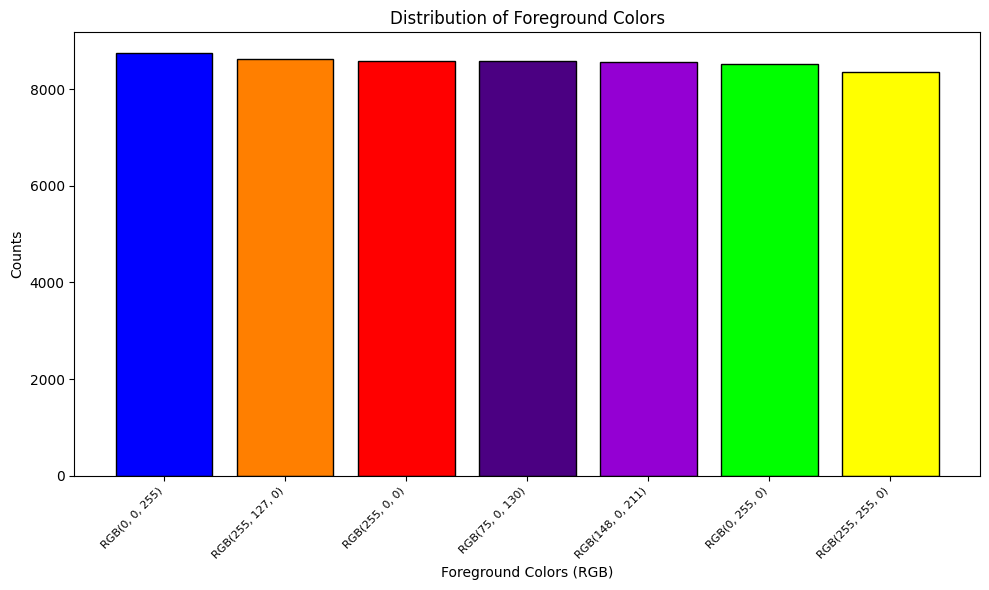

In [ ]:
import matplotlib.pyplot as plt

def plot_fg_color_distribution(data, top_n=None):
    # 모든 전경 색상(fg_data, closest_fg_color)을 수집
    fg_colors = [entry[0] for entry in data if entry[0] is not None]

    # 각 색상의 빈도 계산
    color_counts = Counter(fg_colors)

    # 빈도수 기준으로 정렬
    sorted_colors = color_counts.most_common()

    # 상위 n개만 표시 (선택적으로)
    if top_n:
        sorted_colors = sorted_colors[:top_n]

    # 색상 (RGB)와 빈도를 분리
    labels, counts = zip(*sorted_colors)

    # 그래프 생성
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(labels)), counts, color=[(r/255, g/255, b/255) for r, g, b in labels], edgecolor='black')

    # x축 레이블 설정
    plt.xticks(range(len(labels)), [f"RGB{label}" for label in labels], rotation=45, ha='right', fontsize=8)

    # 그래프 제목 및 축 라벨 설정
    plt.title("Distribution of Foreground Colors")
    plt.xlabel("Foreground Colors (RGB)")
    plt.ylabel("Counts")

    # 그래프 레이아웃 조정 및 표시
    plt.tight_layout()
    plt.show()

# 실행 (상위 10개의 색상만 표시)
plot_fg_color_distribution(processed_euclidean_data, top_n=10)


# 7개의 데이터 종류별로 조사 7개의 데이터로 편향되는걸 확인 오버피팅이 됨을 확인할 수 있다.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# 전경 데이터를 추출
foreground_data = list(zip(
    [item[0] for item in processed_euclidean_data],  # 전경 픽셀 데이터 (R, G, B)
    [item[2] for item in processed_euclidean_data],  # 전경 레이블
    [item[4] for item in processed_euclidean_data]   # 전경 인덱스
))

# 후경 데이터를 추출
background_data = list(zip(
    [item[1] for item in processed_euclidean_data],  # 후경 픽셀 데이터 (R, G, B)
    [item[3] for item in processed_euclidean_data],  # 후경 레이블
    [item[4] for item in processed_euclidean_data]   # 후경 인덱스
))






# 8:1:1로 데이터 분할 - 전경
foreground_train, foreground_temp = train_test_split(foreground_data, test_size=0.2, random_state=42)
foreground_valid, foreground_test = train_test_split(foreground_temp, test_size=0.5, random_state=42)

# 8:1:1로 데이터 분할 - 후경
background_train, background_temp = train_test_split(background_data, test_size=0.2, random_state=42)
background_valid, background_test = train_test_split(background_temp, test_size=0.5, random_state=42)



# 데이터를 각각 분리
def split_data(data):
    features, labels, indices = zip(*data)
    return np.array(features), np.array(labels), np.array(indices)

# 전경 데이터 분리
X_foreground_train, y_foreground_train, idx_foreground_train = split_data(foreground_train)
X_foreground_valid, y_foreground_valid, idx_foreground_valid = split_data(foreground_valid)
X_foreground_test, y_foreground_test, idx_foreground_test = split_data(foreground_test)

# 후경 데이터 분리
X_background_train, y_background_train, idx_background_train = split_data(background_train)
X_background_valid, y_background_valid, idx_background_valid = split_data(background_valid)
X_background_test, y_background_test, idx_background_test = split_data(background_test)

# 전경 분류기 학습
foreground_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
foreground_clf.fit(X_foreground_train, y_foreground_train)

# 후경 분류기 학습
background_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
background_clf.fit(X_background_train, y_background_train)

# 전경 검증 데이터 평가
y_foreground_valid_pred = foreground_clf.predict(X_foreground_valid)
print("Foreground Validation Accuracy:", accuracy_score(y_foreground_valid, y_foreground_valid_pred))

# 후경 검증 데이터 평가
y_background_valid_pred = background_clf.predict(X_background_valid)
print("Background Validation Accuracy:", accuracy_score(y_background_valid, y_background_valid_pred))

# 전경 테스트 데이터 평가
y_foreground_test_pred = foreground_clf.predict(X_foreground_test)
print("Foreground Test Accuracy:", accuracy_score(y_foreground_test, y_foreground_test_pred))
print("Foreground Classification Report:\n", classification_report(y_foreground_test, y_foreground_test_pred))

# 후경 테스트 데이터 평가
y_background_test_pred = background_clf.predict(X_background_test)
print("Background Test Accuracy:", accuracy_score(y_background_test, y_background_test_pred))
print("Background Classification Report:\n", classification_report(y_background_test, y_background_test_pred))


Foreground Validation Accuracy: 0.8506666666666667
Background Validation Accuracy: 1.0
Foreground Test Accuracy: 0.8568333333333333
Foreground Classification Report:
               precision    recall  f1-score   support

        BLUE       1.00      0.99      0.99       871
       GREEN       1.00      1.00      1.00       827
      INDIGO       0.99      0.99      0.99       851
      ORANGE       0.00      0.00      0.00       828
         RED       0.51      1.00      0.68       881
      VIOLET       1.00      1.00      1.00       862
      YELLOW       0.99      0.99      0.99       880

    accuracy                           0.86      6000
   macro avg       0.78      0.85      0.81      6000
weighted avg       0.79      0.86      0.81      6000

Background Test Accuracy: 1.0
Background Classification Report:
               precision    recall  f1-score   support

        BLUE       1.00      1.00      1.00       822
       GREEN       1.00      1.00      1.00       874
      IN

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#위 결과에 따라 예상대로 overfitting으로 인한 성능의 저하를 확인할 수 있습니다. 후경에 유클리드 거리를 사용하지 않기때문에 변화 없음 더하여 테스트 데이터에 대해 이 과정이 적용되었음에도 성능이 낮아졌으므로 이 의견은 파기했습니다.



#두번째, 얇은 글씨의 MNIST데이터를 만들어 직접 추가하는 방식, train데이터에 얇은 글씨로 이루어진 데이터를 추가하여 accuracy를 추가한다면 머신러닝 모델이 노이즈 값에 대한 정보도 학습할 수 있다고 생각하였습니다. 기존 방식을 그대로 가져가되 데이터만 추가하는 방안이라 최종적으로 저희 조는 이 방식을 택했습니다.



#데이터 추가 31개의 얇은 글씨 데이터

저장된 데이터 31개가 불러와졌습니다.


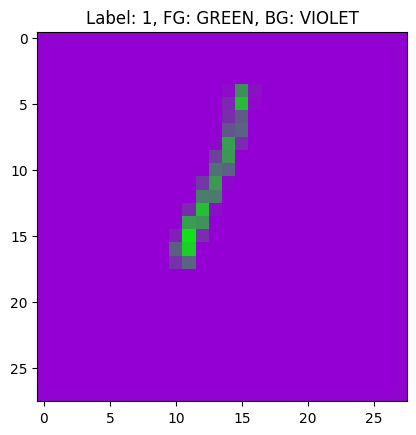

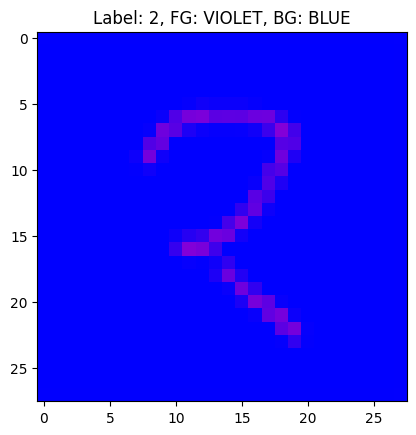

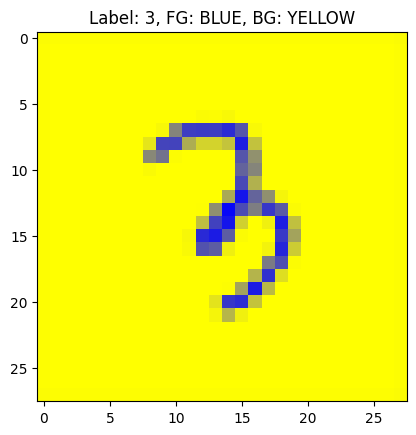

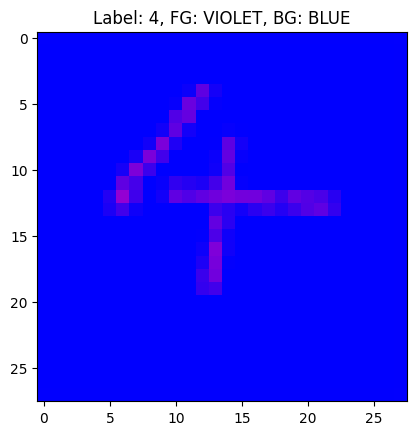

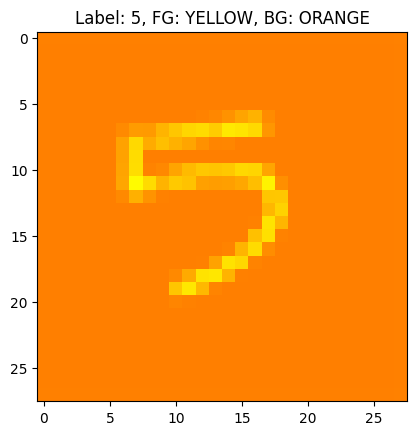

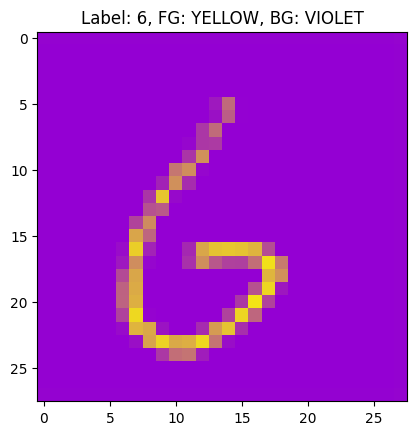

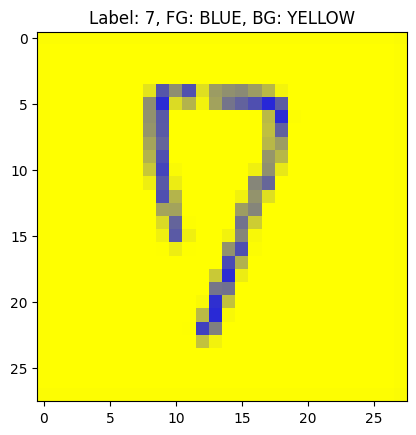

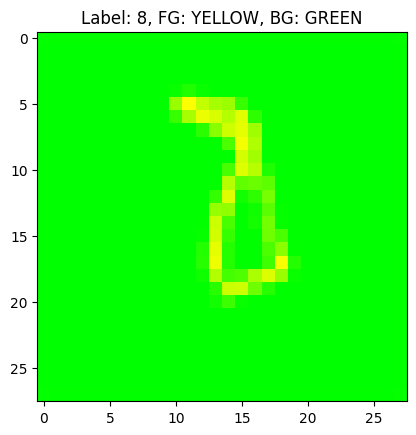

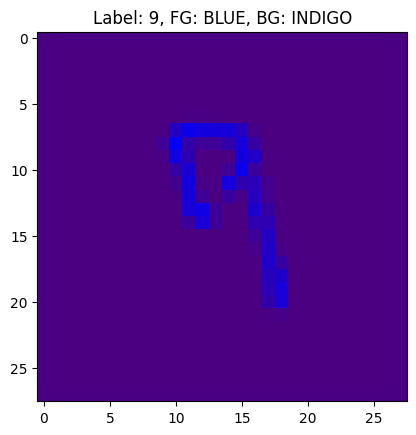

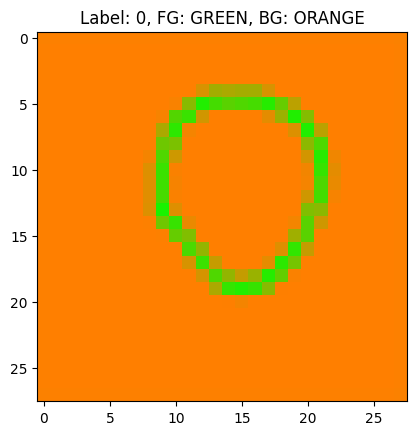

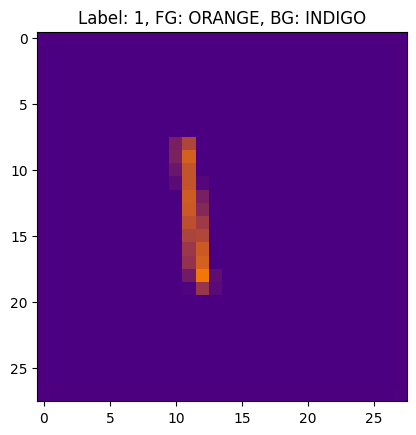

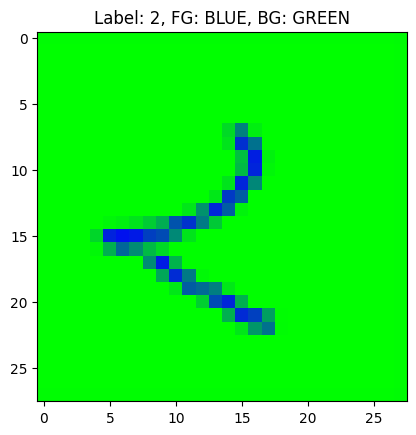

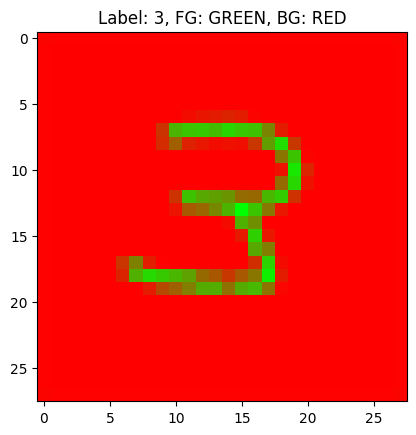

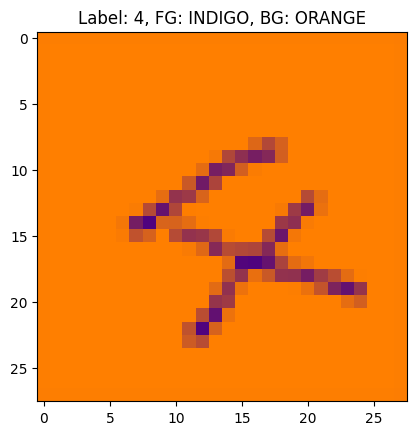

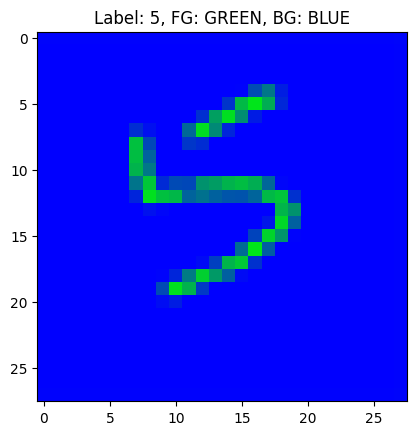

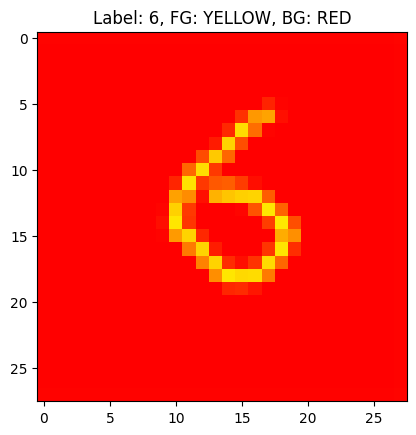

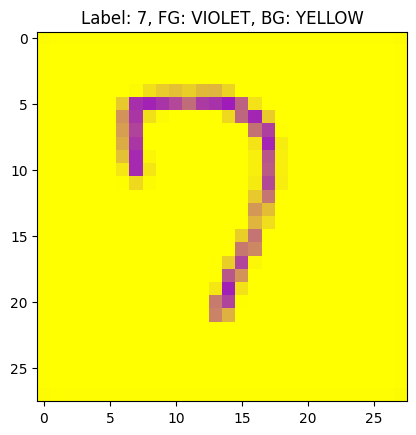

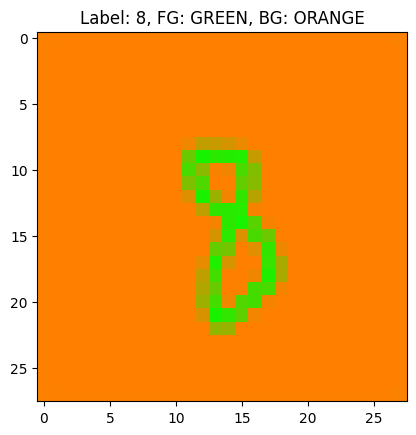

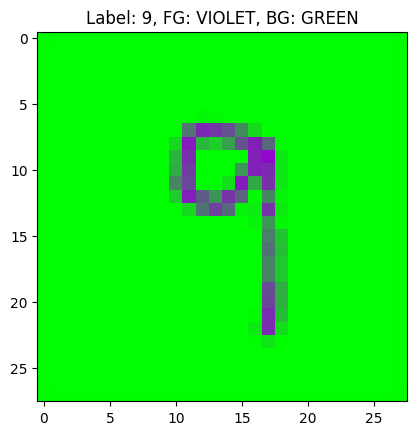

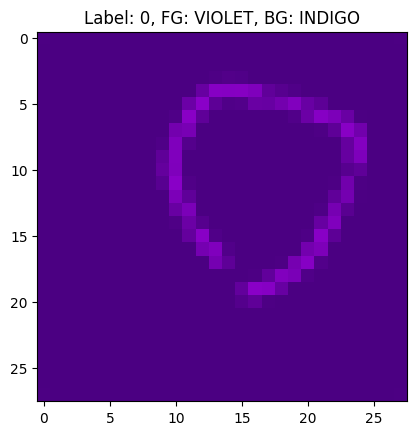

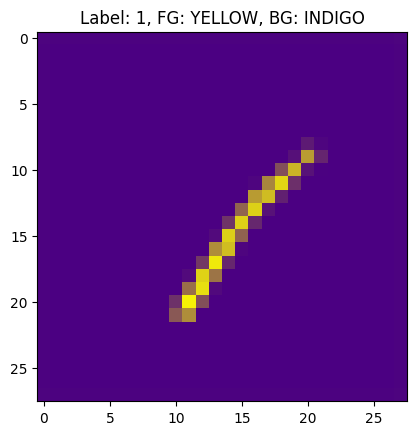

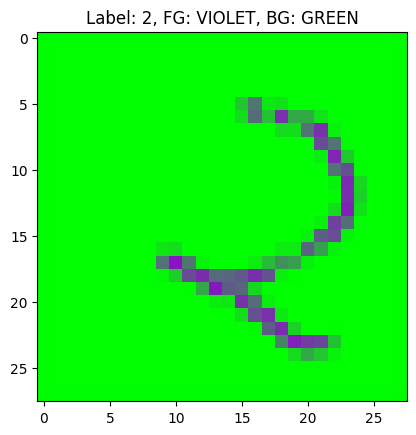

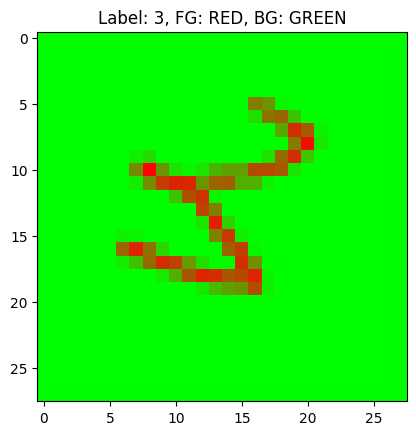

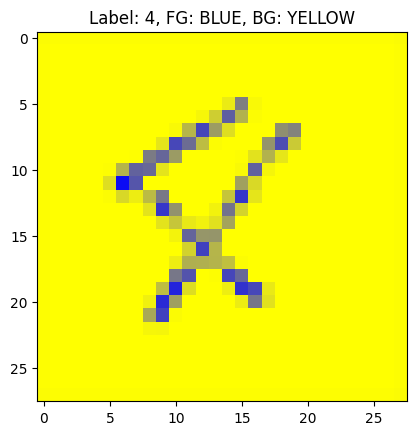

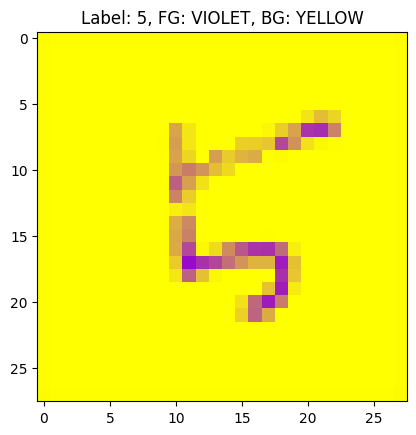

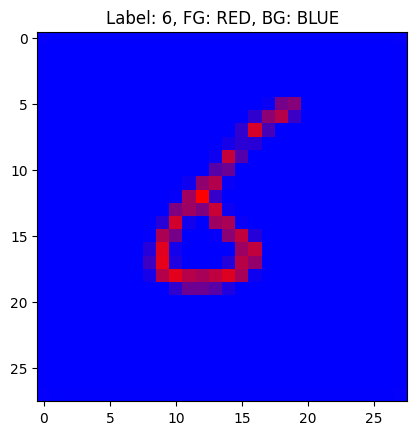

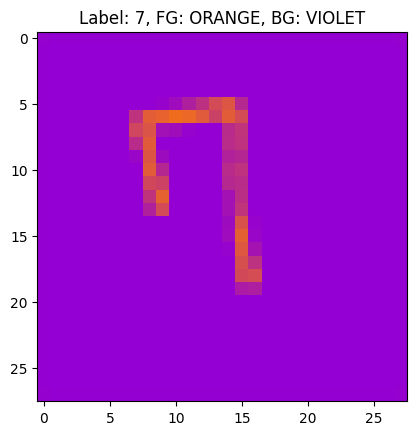

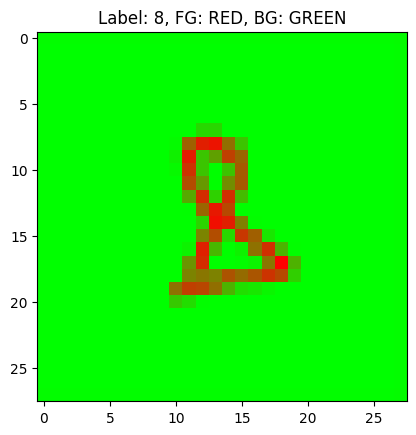

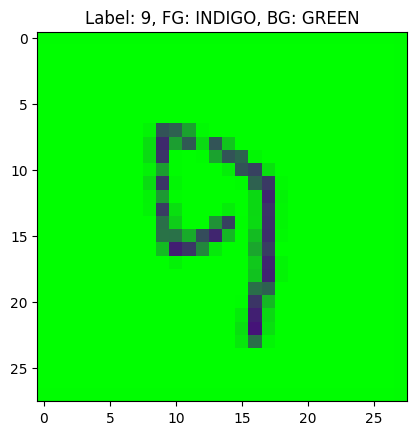

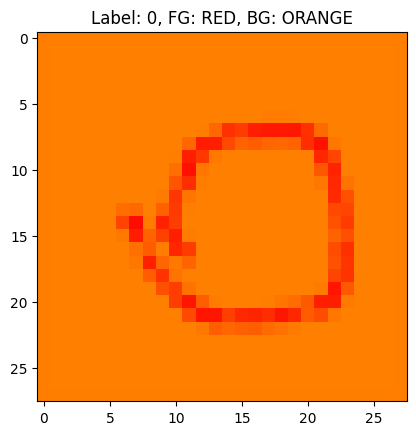

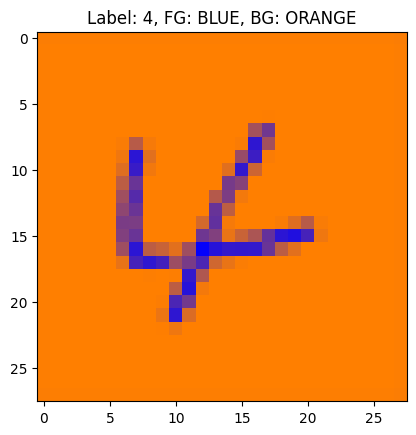

[(<PIL.Image.Image image mode=RGB size=28x28>, 1, 'GREEN', 'VIOLET'),
 (<PIL.Image.Image image mode=RGB size=28x28>, 2, 'VIOLET', 'BLUE'),
 (<PIL.Image.Image image mode=RGB size=28x28>, 3, 'BLUE', 'YELLOW'),
 (<PIL.Image.Image image mode=RGB size=28x28>, 4, 'VIOLET', 'BLUE'),
 (<PIL.Image.Image image mode=RGB size=28x28>, 5, 'YELLOW', 'ORANGE'),
 (<PIL.Image.Image image mode=RGB size=28x28>, 6, 'YELLOW', 'VIOLET'),
 (<PIL.Image.Image image mode=RGB size=28x28>, 7, 'BLUE', 'YELLOW'),
 (<PIL.Image.Image image mode=RGB size=28x28>, 8, 'YELLOW', 'GREEN'),
 (<PIL.Image.Image image mode=RGB size=28x28>, 9, 'BLUE', 'INDIGO'),
 (<PIL.Image.Image image mode=RGB size=28x28>, 0, 'GREEN', 'ORANGE'),
 (<PIL.Image.Image image mode=RGB size=28x28>, 1, 'ORANGE', 'INDIGO'),
 (<PIL.Image.Image image mode=RGB size=28x28>, 2, 'BLUE', 'GREEN'),
 (<PIL.Image.Image image mode=RGB size=28x28>, 3, 'GREEN', 'RED'),
 (<PIL.Image.Image image mode=RGB size=28x28>, 4, 'INDIGO', 'ORANGE'),
 (<PIL.Image.Image image m

In [ ]:
import os
import pickle
from PIL import Image
import numpy as np
# 불러오기

output_file = "output_data.pkl"

def load_data():
    """저장된 pickle 파일에서 데이터를 불러오기"""
    with open(output_file, 'rb') as f:
        loaded_data = pickle.load(f)
    print(f"저장된 데이터 {len(loaded_data)}개가 불러와졌습니다.")
    return loaded_data


loaded_data = load_data()

# 예시로 불러온 이미지 출력
for idx, (image, label, fg_color, bg_color) in enumerate(loaded_data):
    plt.imshow(np.array(image))
    plt.title(f"Label: {label}, FG: {fg_color}, BG: {bg_color}")
    plt.show()


loaded_data

In [ ]:
################
##################
###############데이터 추가 코드
import os
import pickle
from PIL import Image
import numpy as np


output_file = "output_data.pkl"





print(loaded_data)


from PIL import Image
import numpy as np
from collections import Counter

# 각 채널에서 후경 채널의 가장 많이 분포된 값을 추출 (후경은 bg_label로 추정)
def get_background_values(channel):
    # 2D 배열을 1D 배열로 변환
    channel_flat = channel.flatten()

    # 각 값의 빈도 계산
    counter = Counter(channel_flat)

    # 가장 빈도가 높은 값 추출
    most_common_value, _ = counter.most_common(1)[0]
    return most_common_value

def get_foreground_values(channel, most_common_bg_value):
    # 2D 배열을 1D 배열로 변환
    channel_flat = channel.flatten()

    # 모든 값이 동일한지 확인
    if np.all(channel_flat == channel_flat[0]):
        return channel_flat[0]  # 모든 값이 같으면 그 값을 반환

    # 숫자 부분(전경 부분)의 인덱스를 필터링
    fg_indices = np.where(channel_flat != most_common_bg_value)[0]  # 후경 값이 아닌 부분의 인덱스

    # 해당 인덱스의 값을 추출
    fg_values = channel_flat[fg_indices]

    # 전경 값들 중 가장 빈도가 높은 값 계산
    if len(fg_values) > 0:
        counter = Counter(fg_values)
        most_common_fg_value, _ = counter.most_common(1)[0]  # 가장 빈도가 높은 값
    else:
        most_common_fg_value = None  # 전경 값이 없는 경우 None 반환

    return most_common_fg_value

# 전체 output_images 데이터셋에 대해 처리
def process_output_images(output_images):
    color_output_images = []  # 결과를 저장할 리스트
    #인덱스 추가
    i = 0
    for image_data in output_images:
        image, label, fg_label, bg_label = image_data

        # 이미지를 numpy 배열로 변환
        pixel_data = np.array(image)

        # 채널별 RGB 값 추출
        r_channel = pixel_data[:, :, 0]  # Red 채널
        g_channel = pixel_data[:, :, 1]  # Green 채널
        b_channel = pixel_data[:, :, 2]  # Blue 채널

        # 후경 값 구하기
        r_bg_values = get_background_values(r_channel)
        g_bg_values = get_background_values(g_channel)
        b_bg_values = get_background_values(b_channel)

        bg_data = (r_bg_values, g_bg_values, b_bg_values)

        # 전경 값 구하기
        r_fg_values = get_foreground_values(r_channel, r_bg_values)
        g_fg_values = get_foreground_values(g_channel, g_bg_values)
        b_fg_values = get_foreground_values(b_channel, b_bg_values)

        fg_data = (r_fg_values, g_fg_values, b_fg_values)

        # 최종 데이터 저장
        color_output_images.append(( fg_data,bg_data, fg_label, bg_label,i))
        i = i + 1
    return color_output_images

# 예제: 60000개의 output_images 데이터 처리
processed_added_data = process_output_images(loaded_data)

# 결과 확인
print(f"처리된 데이터 개수: {len(processed_added_data)}")
print(f"첫 번째 데이터: {processed_added_data[0]}")
print(f"두 번째 데이터: {processed_added_data[1]}")
print(f"세 번째 데이터: {processed_added_data[2]}")
print(f"네 번째 데이터: {processed_added_data[3]}")

[(<PIL.Image.Image image mode=RGB size=28x28 at 0x7E2F012A3220>, 1, 'GREEN', 'VIOLET'), (<PIL.Image.Image image mode=RGB size=28x28 at 0x7E2EECBF1780>, 2, 'VIOLET', 'BLUE'), (<PIL.Image.Image image mode=RGB size=28x28 at 0x7E2EECBF1390>, 3, 'BLUE', 'YELLOW'), (<PIL.Image.Image image mode=RGB size=28x28 at 0x7E2F012B6B60>, 4, 'VIOLET', 'BLUE'), (<PIL.Image.Image image mode=RGB size=28x28 at 0x7E2F012B6B90>, 5, 'YELLOW', 'ORANGE'), (<PIL.Image.Image image mode=RGB size=28x28 at 0x7E2F012B6B30>, 6, 'YELLOW', 'VIOLET'), (<PIL.Image.Image image mode=RGB size=28x28 at 0x7E2F012B7280>, 7, 'BLUE', 'YELLOW'), (<PIL.Image.Image image mode=RGB size=28x28 at 0x7E2F012B6C20>, 8, 'YELLOW', 'GREEN'), (<PIL.Image.Image image mode=RGB size=28x28 at 0x7E2F012B72E0>, 9, 'BLUE', 'INDIGO'), (<PIL.Image.Image image mode=RGB size=28x28 at 0x7E2F012B6C50>, 0, 'GREEN', 'ORANGE'), (<PIL.Image.Image image mode=RGB size=28x28 at 0x7E2F012B6CB0>, 1, 'ORANGE', 'INDIGO'), (<PIL.Image.Image image mode=RGB size=28x28 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# 전경 데이터를 추출
foreground_data = list(zip(
    [item[0] for item in processed_data],  # 전경 픽셀 데이터 (R, G, B)
    [item[2] for item in processed_data],  # 전경 레이블
    [item[4] for item in processed_data]   # 전경 인덱스
))

# 후경 데이터를 추출
background_data = list(zip(
    [item[1] for item in processed_data],  # 후경 픽셀 데이터 (R, G, B)
    [item[3] for item in processed_data],  # 후경 레이블
    [item[4] for item in processed_data]   # 후경 인덱스
))


##추가 전경데이터를 추출
foreground_added_data = list(zip(
    [item[0] for item in processed_added_data],  # 전경 픽셀 데이터 (R, G, B)
    [item[2] for item in processed_added_data],  # 전경 레이블
    [item[4] for item in processed_added_data]   # 전경 인덱스
))

# 추가 후경 데이터를 추출
background_added_data = list(zip(
    [item[1] for item in processed_added_data],  # 후경 픽셀 데이터 (R, G, B)
    [item[3] for item in processed_added_data],  # 후경 레이블
    [item[4] for item in processed_added_data]   # 후경 인덱스
))





# 8:1:1로 데이터 분할 - 전경
foreground_train, foreground_temp = train_test_split(foreground_data, test_size=0.2, random_state=42)
foreground_valid, foreground_test = train_test_split(foreground_temp, test_size=0.5, random_state=42)

# 8:1:1로 데이터 분할 - 후경
background_train, background_temp = train_test_split(background_data, test_size=0.2, random_state=42)
background_valid, background_test = train_test_split(background_temp, test_size=0.5, random_state=42)


##############
# 추가 데이터를 기존의 훈련 데이터에 결합
foreground_train += foreground_added_data
background_train += background_added_data
###############


# 데이터를 각각 분리
def split_data(data):
    features, labels, indices = zip(*data)
    return np.array(features), np.array(labels), np.array(indices)

# 전경 데이터 분리
X_foreground_train, y_foreground_train, idx_foreground_train = split_data(foreground_train)
X_foreground_valid, y_foreground_valid, idx_foreground_valid = split_data(foreground_valid)
X_foreground_test, y_foreground_test, idx_foreground_test = split_data(foreground_test)

# 후경 데이터 분리
X_background_train, y_background_train, idx_background_train = split_data(background_train)
X_background_valid, y_background_valid, idx_background_valid = split_data(background_valid)
X_background_test, y_background_test, idx_background_test = split_data(background_test)

# 전경 분류기 학습
foreground_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
foreground_clf.fit(X_foreground_train, y_foreground_train)

# 후경 분류기 학습
background_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
background_clf.fit(X_background_train, y_background_train)

# 전경 검증 데이터 평가
y_foreground_valid_pred = foreground_clf.predict(X_foreground_valid)
print("Foreground Validation Accuracy:", accuracy_score(y_foreground_valid, y_foreground_valid_pred))

# 후경 검증 데이터 평가
y_background_valid_pred = background_clf.predict(X_background_valid)
print("Background Validation Accuracy:", accuracy_score(y_background_valid, y_background_valid_pred))

# 전경 테스트 데이터 평가
y_foreground_test_pred = foreground_clf.predict(X_foreground_test)
print("Foreground Test Accuracy:", accuracy_score(y_foreground_test, y_foreground_test_pred))
print("Foreground Classification Report:\n", classification_report(y_foreground_test, y_foreground_test_pred))

# 후경 테스트 데이터 평가
y_background_test_pred = background_clf.predict(X_background_test)
print("Background Test Accuracy:", accuracy_score(y_background_test, y_background_test_pred))
print("Background Classification Report:\n", classification_report(y_background_test, y_background_test_pred))


Foreground Validation Accuracy: 0.992
Background Validation Accuracy: 1.0
Foreground Test Accuracy: 0.9935
Foreground Classification Report:
               precision    recall  f1-score   support

        BLUE       1.00      0.99      0.99       871
       GREEN       0.99      1.00      0.99       827
      INDIGO       0.99      0.99      0.99       851
      ORANGE       1.00      1.00      1.00       828
         RED       0.99      1.00      0.99       881
      VIOLET       1.00      1.00      1.00       862
      YELLOW       1.00      0.99      0.99       880

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

Background Test Accuracy: 1.0
Background Classification Report:
               precision    recall  f1-score   support

        BLUE       1.00      1.00      1.00       822
       GREEN       1.00      1.00      1.00       874
      INDIGO       1.00      1.00

#위의 accuracy값을 보았을때 48000개의 데이터에 더하여 31개의 데이터를 추가하였을 경우 0.05퍼센트의 accuracy증가 폭을 볼 수 있고 test 데이터에 대해서는 0.0016퍼센트의 하락을 볼 수 있습니다. 극소량의 데이터 추가에도 검증 데이터에 대해 성능이 오른 부분을 보았을 때 데이터를 더욱 추가한다면 후에 테스트 데이터에서도 성능이 오를것으로 예상되고 노이즈에도 강한 머신러닝 모델이 만들어질 것으로 결론을 내렸습니다.

#sgd classifier모델만 사용한 이유는 하나의 픽셀값을 사용한 모델이다보니 선형 모델 기반 머신러닝 모델이 적합하다고 생각했으며 accuracy가 99퍼센트에 달하는 결과에 따라 다른 모델을 학습시켜 더 나은 방향을 모색하기 보다 오분류 데이터에 대한 방안을 모색하는 것이 더욱 적합하다고 생각했습니다.